In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Traffic.csv to Traffic (1).csv


In [ ]:
import pandas as pd

file_path = 'Traffic.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame and features
print(df.head())
print(df.columns)
print(df.describe())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')
              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean     16.000000    68.6

In [ ]:
#Step 1: Preprocessing
# 1.1 Convert 'Time' to Datetime64 format

import pandas as pd
# Change the format string to match the actual data format
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')
# %I: Hour (12-hour clock)
# %M: Minute
# %S: Second
# %p: AM/PM

df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,1900-01-01 00:00:00,10,Tuesday,31,0,4,4,39,low
1,1900-01-01 00:15:00,10,Tuesday,49,0,3,3,55,low
2,1900-01-01 00:30:00,10,Tuesday,46,0,3,6,55,low
3,1900-01-01 00:45:00,10,Tuesday,51,0,2,5,58,low
4,1900-01-01 01:00:00,10,Tuesday,57,6,15,16,94,normal


In [ ]:
# 1.2 Extract hour and weekday

df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.date

# Map numeric days to descriptive names
# days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
#             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# df['week_day'] = df['week_day'].map(days_map)


df.head()



,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Day
0,1900-01-01 00:00:00,10,Tuesday,31,0,4,4,39,low,0,1900-01-01
1,1900-01-01 00:15:00,10,Tuesday,49,0,3,3,55,low,0,1900-01-01
2,1900-01-01 00:30:00,10,Tuesday,46,0,3,6,55,low,0,1900-01-01
3,1900-01-01 00:45:00,10,Tuesday,51,0,2,5,58,low,0,1900-01-01
4,1900-01-01 01:00:00,10,Tuesday,57,6,15,16,94,normal,1,1900-01-01


In [ ]:
# 1.4 Group data by hour

print(df.columns)
hourly_traffic = df.groupby('Hour')['Date'].mean()

hourly_traffic = hourly_traffic.rename('Hourly Traffic')
print(hourly_traffic)


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'Hour', 'Day'],
      dtype='object')
Hour
0     16.0
1     16.0
2     16.0
3     16.0
4     16.0
5     16.0
6     16.0
7     16.0
8     16.0
9     16.0
10    16.0
11    16.0
12    16.0
13    16.0
14    16.0
15    16.0
16    16.0
17    16.0
18    16.0
19    16.0
20    16.0
21    16.0
22    16.0
23    16.0
Name: Hourly Traffic, dtype: float64


In [ ]:
# 1.5 Identify missing data

print(df.isnull().sum())

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
Hour                 0
Day                  0
dtype: int64


In [ ]:


import numpy as np
import pandas as pd



def min_max_impute(column):
    """Perform min-max imputation for a numeric column."""
    # Convert the column to numeric, handling errors by coercing to NaN
    column = pd.to_numeric(column, errors='coerce')
    # Handle potential inf values
    column = column[np.isfinite(column)]
    col_min = column.min()
    col_max = column.max()
    # Check for valid range
    if not np.isfinite(col_min) or not np.isfinite(col_max):
        # Handle cases where min/max are not finite (e.g., all NaNs)
        # You might want to use a different imputation strategy here
        return column.fillna(column.mean())  # Or other suitable imputation
    # Replace missing values with random values between min and max
    column_imputed = column.apply(lambda x: np.random.uniform(col_min, col_max) if pd.isnull(x) else x)
    return column_imputed

# Assuming your DataFrame 'df' is already loaded
columns_to_check = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

for col in columns_to_check:
    if col in df.columns:
        df[col] = min_max_impute(df[col])
        print(f"Min of {col}:", df[col].min())
        print(f"Max of {col}:", df[col].max())
    else:
        print(f"Column '{col}' not found in DataFrame.")

Min of CarCount: 6
Max of CarCount: 180
Min of BikeCount: 0
Max of BikeCount: 70
Min of BusCount: 0
Max of BusCount: 50
Min of TruckCount: 0
Max of TruckCount: 40


In [ ]:
# 1.6.1 Find outliers in data

Q1 = df['Date'].quantile(0.25)
Q3 = df['Date'].quantile(0.75)
IQR = Q3 - Q1
# outliers = df[(df['Date'] < Q1 - 1.5 * IQR) | (df['Date'] > Q3 + 1.5 * IQR)]
# print(outliers)
# # Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Date'] < lower_bound) | (df['Date'] > upper_bound)]
print("Outliers Detected:\n", outliers)

# Mark non-outliers
df['Flow_cleaned'] = df['Date'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

Outliers Detected:
 Empty DataFrame
Columns: [Time, Date, Day of the week, CarCount, BikeCount, BusCount, TruckCount, Total, Traffic Situation, Hour, Day]
Index: []


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Select columns of interest
columns_of_interest = ['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Hour']
data_for_clustering = df[columns_of_interest].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'Date' to numeric if it is not already
data_for_clustering['Date'] = pd.to_numeric(pd.to_datetime(data_for_clustering['Date'], errors='coerce'))

# Step 2: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)

# Step 3: Fit K-Means with an appropriate number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Compute the distance of each point to its cluster centroid
distances = np.linalg.norm(normalized_data - kmeans.cluster_centers_[df['Cluster']], axis=1)

# Step 5: Identify outliers based on distance threshold
threshold = np.percentile(distances, 95)  # Top 5% as outliers
df['Outlier'] = distances > threshold

# Step 6: Remove outliers
data_cleaned = df.loc[~df['Outlier']]  # Use .loc[] for filtering


# DATA AUGMENTATION


In [ ]:
#  Data Augmentation using GANs

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout

# Prepare data for GAN
features = ['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Hour']
data_for_gan = data_cleaned[features]

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_for_gan)


In [ ]:
# Define the Generator for the GAN

def build_generator(input_dim, output_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dense(128),
        LeakyReLU(alpha=0.2),
        Dense(output_dim, activation='tanh')
    ])
    return model

In [ ]:
#1.7.2 Define the discriminator

def build_discriminator(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),
        Dense(64),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
#1.7.3 compile the GAN

def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training
    model = Sequential([generator, discriminator])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model


In [ ]:
#Training

# Initialize models
input_dim = normalized_data.shape[1]  # Number of features
generator = build_generator(input_dim=100, output_dim=input_dim)  # Latent space of 100
discriminator = build_discriminator(input_dim=input_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan = build_gan(generator, discriminator)

# Training parameters
epochs = 1000
batch_size = 64

# Training loop
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, normalized_data.shape[0], batch_size)
    real_samples = normalized_data[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)))
    X = np.vstack((real_samples, fake_samples))
    y = np.array([1] * batch_size + [0] * batch_size)
    discriminator_loss = discriminator.train_on_batch(X, y)

    # Train generator via GAN
    noise = np.random.normal(0, 1, (batch_size, 100))
    y_gan = np.array([1] * batch_size)  # Fool the discriminator
    generator_loss = gan.train_on_batch(noise, y_gan)

    # Print progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, Discriminator Loss: 0.7385669946670532, Generator Loss: [array(0.738567, dtype=float32), array(0.738567, dtype=float32), array(0.2265625, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━

In [ ]:
# 1.7.5 Generate synthetic data
num_samples = 1000
noise = np.random.normal(0, 1, (num_samples, 100))
synthetic_data = generator.predict(noise)

# Transform back to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Create DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=features)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# 1.7.6 Combine real and synthetic data
augmented_data = pd.concat([data_cleaned[features], synthetic_df], ignore_index=True)
print("Augmented Dataset:\n", augmented_data)

Augmented Dataset:
            Date    CarCount  BikeCount   BusCount  TruckCount       Total  \
0     10.000000   31.000000   0.000000   4.000000    4.000000   39.000000   
1     10.000000   49.000000   0.000000   3.000000    3.000000   55.000000   
2     10.000000   46.000000   0.000000   3.000000    6.000000   55.000000   
3     10.000000   51.000000   0.000000   2.000000    5.000000   58.000000   
4     10.000000   57.000000   6.000000  15.000000   16.000000   94.000000   
...         ...         ...        ...        ...         ...         ...   
3822 -28.997379 -166.958221  56.995476 -49.988415  -39.998798   86.496025   
3823 -28.999834 -166.996994  56.999840 -49.999645  -39.999634   -0.417135   
3824 -28.997665 -166.992294  56.996292 -49.999031  -39.997856  145.604782   
3825 -28.995396 -166.875458  56.986408 -49.990116  -39.984543   90.117264   
3826 -28.999239 -166.997772  56.998154 -49.998650  -39.999504   56.663792   

           Hour  
0      0.000000  
1      0.000000  
2

In [ ]:
# 2.1 Prepare time-series data with look_back which refers to the number of past time steps (or observations) used as input to predict the next time step

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)




# ATTENTION LAYER

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Multiply, Activation

# Load and preprocess data
data = pd.read_csv("Traffic.csv")

# Encode categorical features
label_encoder = LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])

# Extract hour from time
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour + \
               pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.minute / 60

# Drop unnecessary columns
data_processed = data.drop(columns=['Time', 'Date'])

# Normalize numerical columns
scaler = MinMaxScaler()
numerical_cols = ['Hour', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
data_processed[numerical_cols] = scaler.fit_transform(data_processed[numerical_cols])

# Split data into features (X) and labels (y)
X = data_processed.drop(columns=['Traffic Situation', 'Total'])
y_classification = data_processed['Traffic Situation']
y_regression = data_processed['Total']

# Split data into training and testing sets
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Build models with attention layers
def build_attention_model(input_dim, output_dim, output_activation):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)

    # Attention mechanism
    attention_probs = Dense(input_dim, activation='softmax', name='attention_probs')(inputs)
    attention_output = Multiply(name='attention_output')([inputs, attention_probs])

    # Final output layer
    x = Dense(32, activation='relu')(attention_output)
    outputs = Dense(output_dim, activation=output_activation)(x)
    return Model(inputs, outputs)

# Build classification and regression models
classification_model = build_attention_model(X_train.shape[1], output_dim=4, output_activation='softmax')
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

regression_model = build_attention_model(X_train.shape[1], output_dim=1, output_activation='linear')
regression_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train classification model
classification_model.fit(X_train, y_train_class, epochs=20, batch_size=32, validation_split=0.2)

# Train regression model
regression_model.fit(X_train_reg, y_train_reg, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate models
classification_eval = classification_model.evaluate(X_test, y_test_class)
regression_eval = regression_model.evaluate(X_test_reg, y_test_reg)

print("Classification Evaluation:", classification_eval)
print("Regression Evaluation:", regression_eval)

# Extract attention weights
classification_attention_model = tf.keras.Model(inputs=classification_model.input,
                                                 outputs=classification_model.get_layer("attention_probs").output)
regression_attention_model = tf.keras.Model(inputs=regression_model.input,
                                             outputs=regression_model.get_layer("attention_probs").output)

classification_attention_weights = classification_attention_model.predict(X_test)
regression_attention_weights = regression_attention_model.predict(X_test_reg)

# Compute average attention weights (global feature importance)
classification_feature_importance = classification_attention_weights.mean(axis=0)
regression_feature_importance = regression_attention_weights.mean(axis=0)

# Display feature importance
feature_names = X.columns
classification_importance = dict(zip(feature_names, classification_feature_importance))
regression_importance = dict(zip(feature_names, regression_feature_importance))

print("\nClassification Feature Importance:")
for feature, importance in sorted(classification_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

print("\nRegression Feature Importance:")
for feature, importance in sorted(regression_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4584 - loss: 1.3423 - val_accuracy: 0.5336 - val_loss: 1.1997
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5733 - loss: 1.1388 - val_accuracy: 0.5651 - val_loss: 1.0156
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 0.9907 - val_accuracy: 0.7311 - val_loss: 0.9132
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.9113 - val_accuracy: 0.7626 - val_loss: 0.8300
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7600 - loss: 0.8071 - val_accuracy: 0.7626 - val_loss: 0.7744
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.7434 - val_accuracy: 0.7626 - val_loss: 0.7365
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7586 - loss: 0.7570 - val_accuracy: 0.7668 - val_loss: 0.7055
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7549 - loss: 0.7319 - val_accuracy: 0.7752 - val_loss:

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Multiply

# Load and preprocess data
data = pd.read_csv("Traffic.csv")

# Encode categorical features
label_encoder = LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])

# Extract hour from time
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour + \
               pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.minute / 60

# Drop unnecessary columns
data_processed = data.drop(columns=['Time', 'Date'])

# Normalize numerical columns
scaler = MinMaxScaler()
numerical_cols = ['Hour', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
data_processed[numerical_cols] = scaler.fit_transform(data_processed[numerical_cols])

# Split data into features (X) and labels (y)
X = data_processed.drop(columns=['Traffic Situation', 'Total'])
y_classification = data_processed['Traffic Situation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Build a model with an attention mechanism for feature selection
def build_attention_model(input_dim):
    inputs = Input(shape=(input_dim,))

    # Attention mechanism
    attention_probs = Dense(input_dim, activation='softmax', name='attention_probs')(inputs)
    attention_output = Multiply(name='attention_output')([inputs, attention_probs])

    # Final output layer
    x = Dense(32, activation='relu')(attention_output)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    return Model(inputs, outputs)

# Build and compile the model
attention_model = build_attention_model(X_train.shape[1])
attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
attention_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Extract attention weights
attention_layer_model = Model(inputs=attention_model.input,
                               outputs=attention_model.get_layer("attention_probs").output)
attention_weights = attention_layer_model.predict(X_train)

# Compute average attention weights for feature importance
feature_importance = attention_weights.mean(axis=0)

# Rank features by importance
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Select top-k important features
k = 5  # Number of top features to select
selected_features = [feature for feature, importance in sorted_features[:k]]

print("\nSelected Features:", selected_features)

# Reduce the dataset to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("\nReduced Dataset Shape:", X_train_selected.shape)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1104 - loss: 0.5453 - val_accuracy: 0.0966 - val_loss: -0.0424
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1070 - loss: -0.3504 - val_accuracy: 0.0966 - val_loss: -1.3381
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1089 - loss: -2.1813 - val_accuracy: 0.0966 - val_loss: -4.1406
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1171 - loss: -6.4605 - val_accuracy: 0.0966 - val_loss: -13.2207
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1027 - loss: -17.3218 - val_accuracy: 0.0966 - val_loss: -26.2808
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1178 - loss: -31.0594 - val_accuracy: 0.0966 - val_loss: -39.2552
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1042 - loss: -44.3008 - val_accuracy: 0.0966 - val_loss: -52.7276
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1167 - loss: -60.5240 - val_accura

#CLASSIFICATION

In [ ]:
# 2.2 Build biLSTM model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout


In [ ]:
# 2.3 Define biLSTM model

def build_biLSTM(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.2),
        Bidirectional(LSTM(32)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression (use appropriate activation for classification)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error loss
    return model


In [ ]:
# 2.4 Train the biLSTM Model

# splitting by 30:70

from sklearn.model_selection import train_test_split
# Assign y_classification to y for consistency
y = y_classification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
# Reshape X_train to have a third dimension for features
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

# Reshape X_val and X_test to have the same 3D shape
X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


input_shape = (X_train.shape[1], X_train.shape[2])  # (look_back, num_features)
model = build_biLSTM(input_shape)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 3.6859 - mae: 1.6416 - val_loss: 1.6497 - val_mae: 1.1351
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.6610 - mae: 1.1568 - val_loss: 1.5436 - val_mae: 1.1175
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5844 - mae: 1.1286 - val_loss: 1.4727 - val_mae: 1.1019
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.4704 - mae: 1.0813 - val_loss: 1.1694 - val_mae: 0.9697
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.2042 - mae: 0.9547 - val_loss: 0.5824 - val_mae: 0.5899
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6382 - mae: 0.6315 - val_loss: 0.4707 - val_mae: 0.5314
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6595 - mae: 0.6333 - val_loss: 0.4495 - val_mae: 0.5088
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5467 - mae: 0.5723 - val_loss: 0.4170 - val_mae: 0.4713
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5120 - mae: 0.

In [ ]:
# 2.5 Evaluate the model

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2273 - mae: 0.3139
Test Loss: 0.23712390661239624, Test MAE: 0.31743937730789185


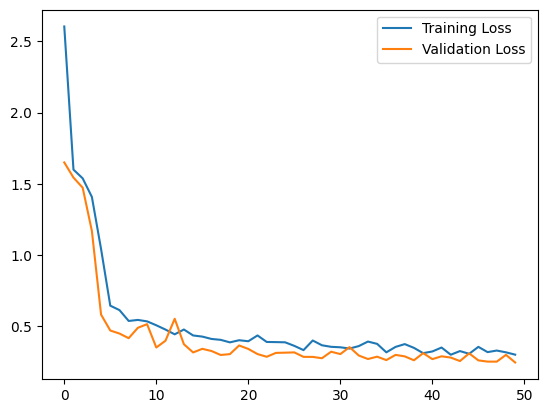

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Compare predictions with actual values using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R².
predictions = model.predict(X_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv("Traffic.csv")

# Preprocess the data
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour + \
               pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.minute / 60
data['Day of the week'] = data['Day of the week'].astype('category').cat.codes

# Create a new target column for traffic after 2 hours
data['Traffic_After_2_Hours'] = data['Total'].shift(-2)

# Drop rows with NaN values after shifting
data = data.dropna()

# Select relevant features
features = ['Hour', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Day of the week']
X = data[features]
y = data['Traffic_After_2_Hours']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM
X_lstm = []
y_lstm = []
sequence_length = 10  # Use the past 10 time steps for prediction
for i in range(len(X_scaled) - sequence_length):
    X_lstm.append(X_scaled[i:i + sequence_length])
    y_lstm.append(y.iloc[i + sequence_length])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Predict a single value: traffic after 2 hours

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


# Predict traffic after 2 hours for new data
predictions = model.predict(X_test)

# Rescale predictions to the original scale
# Create a dummy array with the same shape as X to apply inverse_transform
dummy_array = np.zeros((predictions.shape[0], X.shape[1]))
dummy_array[:, features.index('Total')] = predictions.flatten()

# Apply inverse_transform and extract the rescaled predictions for 'Total'
predictions_rescaled = scaler.inverse_transform(dummy_array)[:, features.index('Total')]

# Print example predictions
for i in range(5):
    print(f"Actual: {y_test[i]}, Predicted: {predictions_rescaled[i]:.2f}")




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 15064.7812 - mae: 106.7484 - val_loss: 6031.3013 - val_mae: 60.7901
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5201.9087 - mae: 56.0743 - val_loss: 3363.2742 - val_mae: 47.0234
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3210.4761 - mae: 45.1803 - val_loss: 3002.1860 - val_mae: 44.3311
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2819.5259 - mae: 43.0363 - val_loss: 2698.0454 - val_mae: 42.0317
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2383.6299 - mae: 39.4936 - val_loss: 2588.5259 - val_mae: 41.0206
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2271.3999 - mae: 38.2240 - val_loss: 1990.3518 - val_mae: 36.6109
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1912.8677 - mae: 34.9998 - val_loss: 1976.3040 - val_mae: 35.5555
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1678.4686 - mae: 32.7281 - val_loss: 1491.1636 - val_mae: 31.2726
Epoch 9/20
60

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


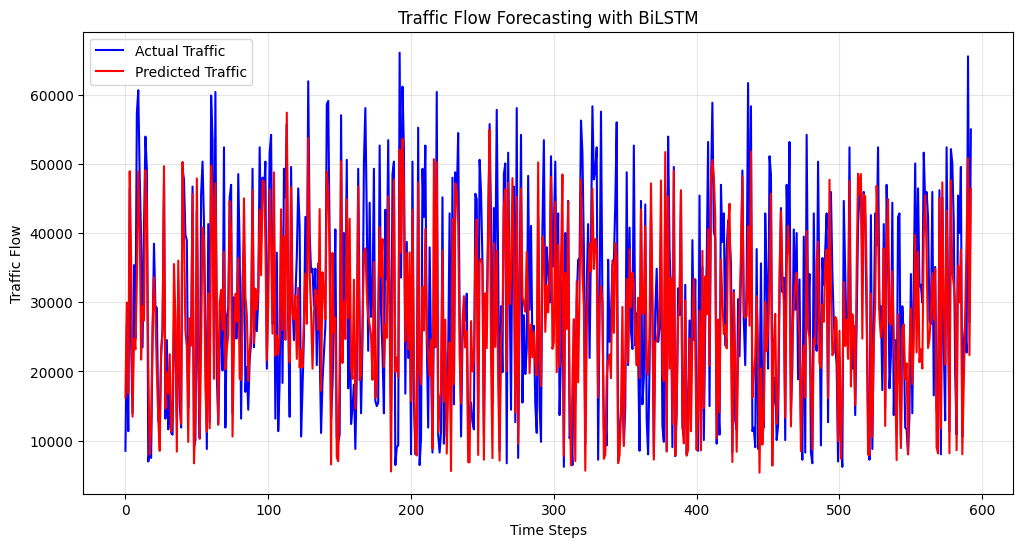

In [ ]:
# Forecast traffic for future time steps
future_predictions = model.predict(X_test)

# Rescale predictions back to the original scale
dummy_array = np.zeros((len(future_predictions), len(features)))  # Use len(features) for the number of features
# Assign the predictions to the 'Total' column index in the dummy array
dummy_array[:, features.index('Total')] = future_predictions.flatten()

# Inverse transform the dummy array to get rescaled predictions
future_predictions_rescaled = scaler.inverse_transform(dummy_array)[:, features.index('Total')]

# Rescale y_test to the original scale
# Create a dummy array for y_test with the correct shape
dummy_array_y_test = np.zeros((len(y_test), len(features)))
dummy_array_y_test[:, features.index('Total')] = y_test

# Inverse transform y_test
y_test_rescaled = scaler.inverse_transform(dummy_array_y_test)[:, features.index('Total')]

# Example: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label="Actual Traffic", color="blue")
plt.plot(range(len(future_predictions_rescaled)), future_predictions_rescaled, label="Predicted Traffic", color="red")
plt.xlabel("Time Steps")
plt.ylabel("Traffic Flow")
plt.title("Traffic Flow Forecasting with BiLSTM")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# 2.6 Identify Busy Hours
import numpy as np
busy_threshold = np.percentile(y_test, 90)  # Top 10% of traffic volumes

busy_hours = [i for i, pred in enumerate(predictions) if pred > busy_threshold]

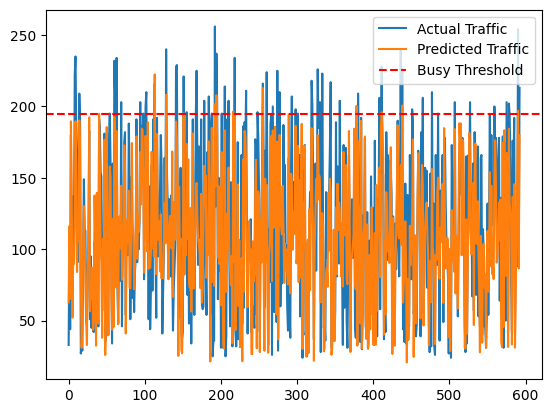

In [ ]:
# 2.7 Visulaize busy hours

import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual Traffic')
plt.plot(predictions, label='Predicted Traffic')
plt.axhline(y=busy_threshold, color='r', linestyle='--', label='Busy Threshold')
plt.legend()
plt.show()

In [ ]:
categorical_columns = ['Traffic Situation', 'Weather']  # Replace with actual column names
for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load the dataset
data = pd.read_csv("Traffic.csv")

# Feature engineering: Add hour of the day as a feature
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour + \
               pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.minute / 60

# Identify and encode categorical variables
label_encoder = LabelEncoder()

# Encode 'Day of the week' if it exists
if 'Day of the week' in data.columns:
    data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])

# Encode other categorical columns, such as 'Traffic Situation', 'Weather', or any other
categorical_columns = ['Traffic Situation', 'Weather']  # Replace with actual column names
for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

# Drop unused columns
data = data.drop(['Time', 'Date'], axis=1)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for GRU
sequence_length = 10  # Use the past 10 time steps
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length, :])  # Features for the past 10 time steps
    y.append(data_scaled[i + sequence_length, 0])   # Predicting the first column (e.g., 'Total')

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build GRU model
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Predicting traffic flow

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict future traffic
predictions = model.predict(X_test)

# Rescale predictions back to the original scale
y_test_rescaled = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), data.shape[1] - 1)))))[:, 0]
predictions_rescaled = scaler.inverse_transform(np.hstack((predictions, np.zeros((len(predictions), data.shape[1] - 1)))))[:, 0]

# Compare predictions with actual values
for i in range(5):
    print(f"Actual: {y_test_rescaled[i]:.2f}, Predicted: {predictions_rescaled[i]:.2f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2810 - mae: 0.4187 - val_loss: 0.0129 - val_mae: 0.0880
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - mae: 0.0557 - val_loss: 0.0051 - val_mae: 0.0355
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - mae: 0.0314 - val_loss: 0.0041 - val_mae: 0.0255
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028 - mae: 0.0255 - val_loss: 0.0038 - val_mae: 0.0229
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - mae: 0.0233 - val_loss: 0.0037 - val_mae: 0.0207
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - mae: 0.0210 - val_loss: 0.0034 - val_mae: 0.0188
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - mae: 0.0179 - val_loss: 0.0033 - val_mae: 0.0181
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mae: 0.0181 - val_loss: 0.0032 - val_mae: 0.0168
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025 - mae: 0.0172 - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load the dataset
data = pd.read_csv("Traffic.csv")

# Add hour feature
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour + \
               pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.minute / 60

# Encode categorical columns
label_encoder = LabelEncoder()

if 'Day of the week' in data.columns:
    data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])

categorical_columns = ['Traffic Situation', 'Weather']  # Replace with actual column names
for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

# Drop unnecessary columns
data = data.drop(['Time', 'Date'], axis=1)

# Create the target column for traffic after 2 hours
data['Traffic_After_2_Hours'] = data['Total'].shift(-2)
data = data.dropna()  # Drop rows with NaN after shifting

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for GRU
sequence_length = 10  # Use the past 10 time steps
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length, :])  # Features from past 10 time steps
    y.append(data_scaled[i + sequence_length, -1])  # Predicting 'Traffic_After_2_Hours'

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build GRU model
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Predicting traffic after 2 hours

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict traffic after 2 hours
predictions = model.predict(X_test)

# Rescale predictions back to the original scale
y_test_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((len(y_test), data.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]
predictions_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((len(predictions), data.shape[1] - 1)), predictions)))[:, -1]

# Print example predictions
for i in range(5):
    print(f"Actual: {y_test_rescaled[i]:.2f}, Predicted: {predictions_rescaled[i]:.2f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0804 - mae: 0.2165 - val_loss: 0.0194 - val_mae: 0.1096
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0199 - mae: 0.1057 - val_loss: 0.0152 - val_mae: 0.0957
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mae: 0.1017 - val_loss: 0.0135 - val_mae: 0.0880
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0158 - mae: 0.0949 - val_loss: 0.0133 - val_mae: 0.0851
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - mae: 0.0952 - val_loss: 0.0122 - val_mae: 0.0830
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mae: 0.0897 - val_loss: 0.0122 - val_mae: 0.0811
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0143 - mae: 0.0888 - val_loss: 0.0118 - val_mae: 0.0808
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0150 - mae: 0.0907 - val_loss: 0.0126 - val_mae: 0.0830
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0147 - mae: 0.0888 -

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


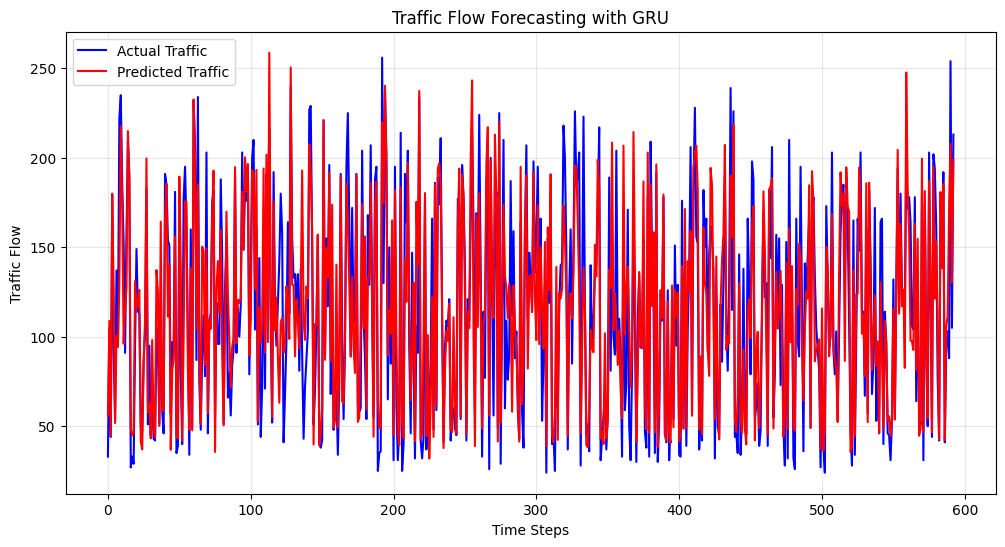

In [ ]:
# Forecast traffic for future time steps
future_predictions = model.predict(X_test)

# Rescale predictions back to the original scale
future_predictions_rescaled = scaler.inverse_transform(
    np.hstack((np.zeros((len(future_predictions), data.shape[1] - 1)), future_predictions))
)[:, -1]

# Example: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), scaler.inverse_transform(
    np.hstack((np.zeros((len(y_test), data.shape[1] - 1)), y_test.reshape(-1, 1)))
)[:, -1], label="Actual Traffic", color="blue")
plt.plot(range(len(future_predictions_rescaled)), future_predictions_rescaled, label="Predicted Traffic", color="red")
plt.xlabel("Time Steps")
plt.ylabel("Traffic Flow")
plt.title("Traffic Flow Forecasting with GRU")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Identify busy hours
threshold = np.percentile(predictions_rescaled, 75)  # Define busy hours as top 25% traffic
busy_hours = predictions_rescaled > threshold

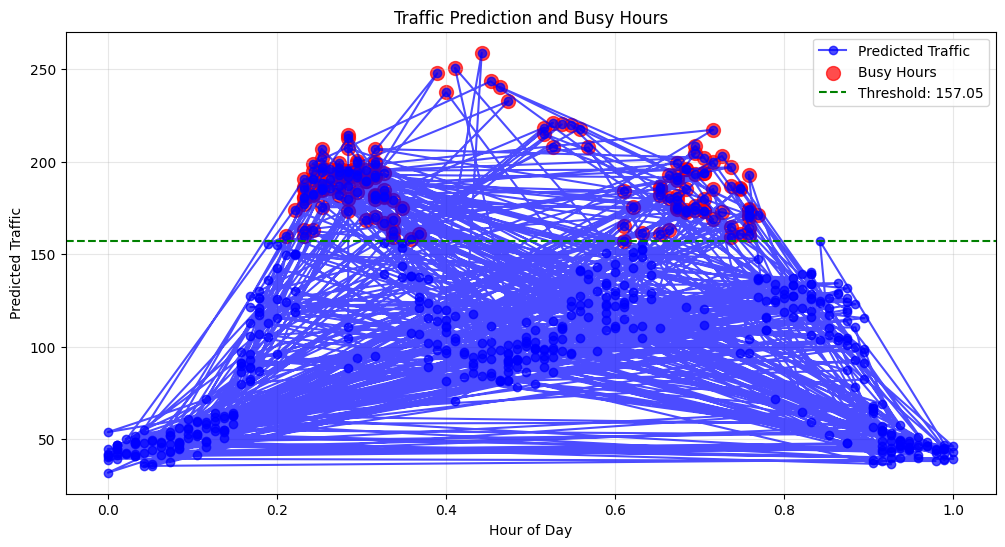

In [ ]:

# Extract corresponding hours from the test data
test_hours = X_test[:, -1, data.columns.get_loc('Hour')]

# Plot predicted traffic
plt.figure(figsize=(12, 6))
plt.plot(test_hours, predictions_rescaled, label="Predicted Traffic", color='blue', marker='o', alpha=0.7)

# Highlight busy hours
plt.scatter(
    test_hours[busy_hours],
    predictions_rescaled[busy_hours],
    color='red',
    label="Busy Hours",
    s=100,
    alpha=0.7
)

# Add labels and title
plt.title("Traffic Prediction and Busy Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Traffic")
plt.axhline(y=threshold, color='green', linestyle='--', label=f"Threshold: {threshold:.2f}")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU, Dropout

# Load the dataset
file_path = 'Traffic.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Feature and target selection
features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
target = 'Total'
X = data[features]
y = data[target]

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create time-series sequences
def create_sequences(data_X, data_y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(data_X) - time_steps):
        X_seq.append(data_X[i:i + time_steps])
        y_seq.append(data_y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the BiGRU model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(GRU(32)),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
evaluation = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse scale the predictions
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Display some results
for i in range(5):
    print(f"Actual: {y_test_rescaled[i][0]:.2f}, Predicted: {y_pred_rescaled[i][0]:.2f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0568 - mae: 0.1769 - val_loss: 0.0146 - val_mae: 0.0920
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0184 - mae: 0.1020 - val_loss: 0.0146 - val_mae: 0.0909
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0175 - mae: 0.1005 - val_loss: 0.0137 - val_mae: 0.0898
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0165 - mae: 0.0947 - val_loss: 0.0135 - val_mae: 0.0874
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mae: 0.0971 - val_loss: 0.0132 - val_mae: 0.0876
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0172 - mae: 0.0975 - val_loss: 0.0134 - val_mae: 0.0850
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0171 - mae: 0.0976 - val_loss: 0.0131 - val_mae: 0.0852
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0178 - mae: 0.0980 - val_loss: 0.0131 - val_mae: 0.0845
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mae: 0

In [ ]:
# Use the last 10 time steps from the test set as the starting sequence
last_sequence = X_test[-1]

# Predict traffic for the next 2 hours (8 steps for 15-minute intervals)
predictions = []
current_sequence = last_sequence

for _ in range(8):
    # Add a batch dimension and predict the next value
    next_prediction = model.predict(current_sequence[np.newaxis, ...])[0][0]
    predictions.append(next_prediction)

    # Update the current sequence
    next_step = np.append(current_sequence[1:], [[next_prediction] * current_sequence.shape[1]], axis=0)
    current_sequence = next_step

# Inverse transform predictions to original scale
predictions_rescaled = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1))

# Display predictions
for i, pred in enumerate(predictions_rescaled):
    print(f"Prediction for {(i+1)*15} minutes later: {pred[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for 15 minutes later: 53.84
Prediction for 30 minutes later: 71.92
Prediction for 45 minutes later: 85.82
Prediction for 60 minutes later: 96.35
Prediction for 75 minutes later: 107.00
Prediction for 90 minutes later: 119.27
Prediction for 105 minutes later: 131.54
Prediction for 120 minutes later: 142.88


Busiest Hours:
    Hour  Total
17    17  22450
16    16  22401
8      8  21619
6      6  21607
7      7  21378


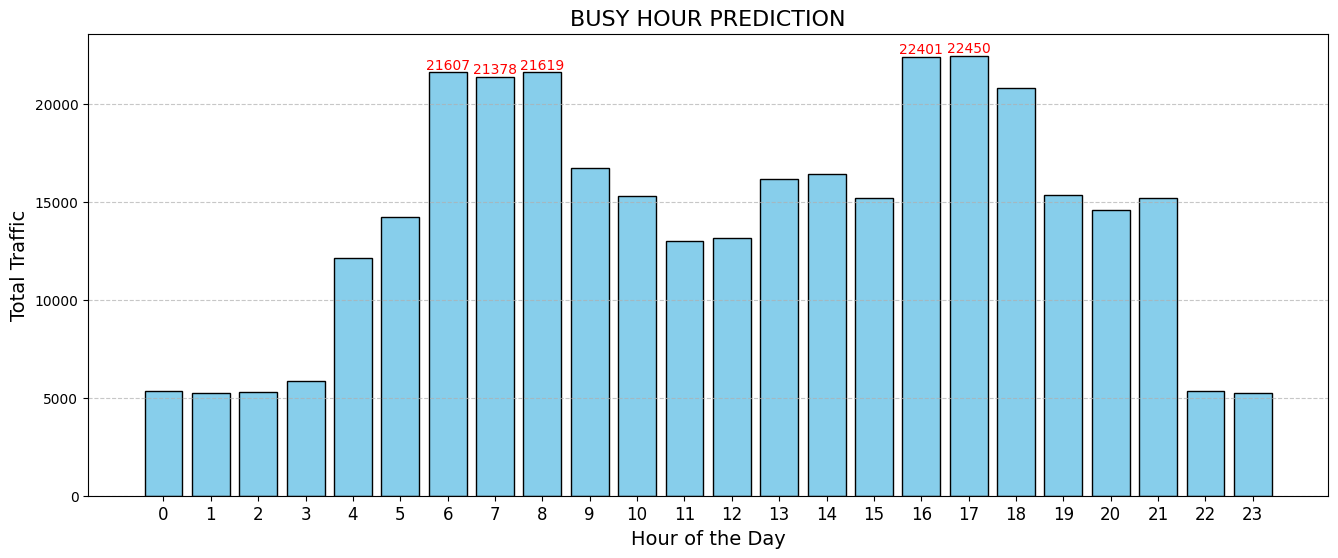

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# Extract hour from the 'Time' column
data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour

# Group by hour and calculate total traffic
hourly_traffic = data.groupby('Hour')['Total'].sum().reset_index()

# Identify the busiest hours
busy_hours = hourly_traffic.sort_values(by='Total', ascending=False).head(5)
print("Busiest Hours:")
print(busy_hours)

# Plot the traffic distribution
plt.figure(figsize=(16, 6))
plt.bar(hourly_traffic['Hour'], hourly_traffic['Total'], color='skyblue', edgecolor='black')
plt.title('BUSY HOUR PREDICTION', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Traffic', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the busiest hours
for index, row in busy_hours.iterrows():
    plt.text(row['Hour'], row['Total'], f"{int(row['Total'])}", ha='center', va='bottom', fontsize=10, color='red')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector, TimeDistributed

# Load the dataset
file_path = 'Traffic.csv'  # Update the path
traffic_data = pd.read_csv(file_path)

# Feature selection and scaling
target = 'Total'
data = traffic_data[[target]]

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for the autoencoder
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps])
    return np.array(sequences)

time_steps = 10
X = create_sequences(data_scaled, time_steps)

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define the autoencoder model
input_layer = Input(shape=(time_steps, 1))

# Encoder
encoded = LSTM(64, activation='relu', return_sequences=False)(input_layer)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = RepeatVector(time_steps)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(1))(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f"Test Loss: {loss}")

# Forecast traffic for the next time step
X_input = X_test[-1:]  # Use the last test sequence
y_pred = autoencoder.predict(X_input)

# Inverse scale the predictions
y_pred_rescaled = scaler.inverse_transform(y_pred[0])
print("Forecasted Traffic for Next Time Steps:", y_pred_rescaled.flatten())


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1110 - val_loss: 0.0258
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0206 - val_loss: 0.0170
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0156 - val_loss: 0.0139
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0129 - val_loss: 0.0114
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

In [ ]:
# Initialize the last sequence from the test set
last_sequence = X_test[-1].copy()

# Predict traffic for the next 2 hours (12 steps for 10-minute intervals)
predictions = []

for _ in range(12):  # 12 steps for 2 hours
    # Predict the next sequence
    next_prediction = autoencoder.predict(last_sequence[np.newaxis, ...])[0]

    # Extract the last value of the sequence as the predicted traffic
    predictions.append(next_prediction[-1, 0])

    # Update the last sequence for the next prediction
    last_sequence = np.append(last_sequence[1:], next_prediction[-1:], axis=0)

# Rescale predictions to the original scale
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the 2-hour traffic predictions
print("Traffic Predictions for the Next 2 Hours (10-minute intervals):")
for i, pred in enumerate(predictions_rescaled.flatten()):
    print(f"{(i + 1) * 10} minutes later: {pred:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Traffic Predictions for the Next 2 Hours (10-minute intervals):
10 minutes later: 40.66
20 minutes later: 38.49
30 minutes later: 37.12
40 minutes later: 36.55
50 minutes later: 35.42
60 minutes later: 32.16
70 minutes later: 28.83
80 minutes later: 25.26
90 minutes later: 22.34
100 minutes later: 17.47
110 minutes later: 14.61
120 minutes later: 10.91


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:582: RuntimeWarning: overflow encountered in divide
  X /= self.scale_


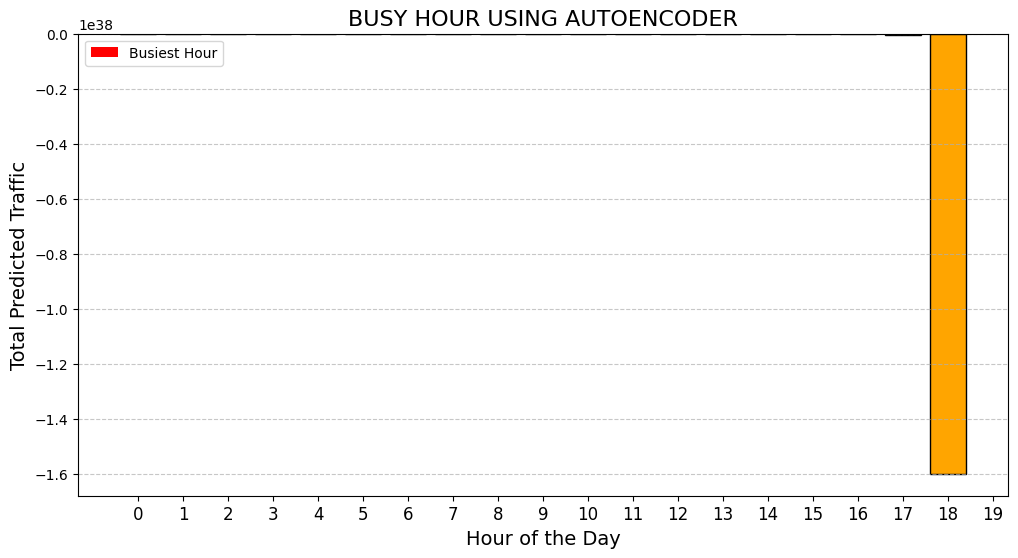

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the last sequence from the test set
last_sequence = X_test[-1].copy()

# Predict traffic for the next 24 hours (6 sequences per hour for 10-minute intervals)
predictions = []
num_steps = 24 * 6  # 24 hours, 6 sequences per hour

for _ in range(num_steps):
    # Predict the next sequence
    next_prediction = autoencoder.predict(last_sequence[np.newaxis, ...])[0]

    # Extract the last value of the sequence as the predicted traffic
    predictions.append(next_prediction[-1, 0])

    # Update the last sequence for the next prediction
    last_sequence = np.append(last_sequence[1:], next_prediction[-1:], axis=0)

# Rescale predictions to the original scale
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Aggregate predictions by hour
hourly_predictions = predictions_rescaled.reshape(-1, 6).sum(axis=1)

# Identify the busiest hours
busiest_hour = np.argmax(hourly_predictions)
print(f"Busiest Hour (Predicted): {busiest_hour}:00 - {busiest_hour + 1}:00")

# Visualization
hours = range(24)
plt.figure(figsize=(12, 6))
plt.bar(hours, hourly_predictions, color='orange', edgecolor='black')
plt.title('BUSY HOUR USING AUTOENCODER', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Predicted Traffic', fontsize=14)
plt.xticks(hours, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the busiest hour
plt.bar(busiest_hour, hourly_predictions[busiest_hour], color='red', label='Busiest Hour')
plt.legend()

plt.show()


#GNN

In [ ]:
pip install torch torchvision torchaudio torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import numpy as np  # Import NumPy for creating adjacency matrix

# Create a graph dataset
def create_graph_data(traffic_data, adjacency_matrix, time_steps):
    node_features, edge_index, targets = [], [], []
    num_nodes = adjacency_matrix.shape[0]

    for i in range(len(traffic_data) - time_steps):
        # Node features for current time window
        node_feat = traffic_data[i:i + time_steps].T  # Transpose to match nodes
        node_features.append(torch.tensor(node_feat, dtype=torch.float))

        # Adjacency matrix as edge index
        edge_idx = torch.tensor(adjacency_matrix.nonzero(), dtype=torch.long)
        edge_index.append(edge_idx)

        # Target is the next time step's traffic flow
        targets.append(torch.tensor(traffic_data[i + time_steps], dtype=torch.float))

    return node_features, edge_index, targets

# Define GNN-based traffic forecasting model
class GNNTrafficForecaster(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNTrafficForecaster, self).__init__()
        self.gcn1 = GCNConv(input_dim, hidden_dim)
        self.gcn2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index, batch):
        x = self.gcn1(x, edge_index)
        x = torch.relu(x)
        x = self.gcn2(x, edge_index)
        x = torch.relu(x)
        x = global_mean_pool(x, batch)  # Pooling over nodes
        x = self.fc(x)
        return x

# Load your data (example data)
# Assuming you have 'traffic_data' as a NumPy array or list
traffic_data = np.random.rand(10, 20)  # Example: 10 nodes, 20 time steps

# Create a sample adjacency matrix (replace with your actual data)
num_nodes = traffic_data.shape[0]
adjacency_matrix = np.random.randint(0, 2, size=(num_nodes, num_nodes))
# Make it symmetric (undirected graph)
adjacency_matrix = np.triu(adjacency_matrix) + np.triu(adjacency_matrix, 1).T

time_steps = 5
# Preprocess data into graph format
node_features, edge_index, targets = create_graph_data(traffic_data, adjacency_matrix, time_steps)

# Prepare PyTorch Geometric dataset
data_list = [
    Data(x=node_features[i], edge_index=edge_index[i], y=targets[i])
    for i in range(len(targets))
]
loader = DataLoader(data_list, batch_size=32, shuffle=True)

# Initialize the model
input_dim = time_steps
hidden_dim = 64
output_dim = 1  # Forecasted traffic flow
model = GNNTrafficForecaster(input_dim, hidden_dim, output_dim)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train the model
model.train()
for epoch in range(20):
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index, batch.batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Use the trained model for forecasting
model.eval()
with torch.no_grad():
    for batch in loader:
        predictions = model(batch.x, batch.edge_index, batch.batch)
        print("Predictions:", predictions)

<ipython-input-51-be95598ec0ea>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  edge_idx = torch.tensor(adjacency_matrix.nonzero(), dtype=torch.long)
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 0.5201
Epoch 2, Loss: 0.4907
Epoch 3, Loss: 0.4627
Epoch 4, Loss: 0.4359
Epoch 5, Loss: 0.4101
Epoch 6, Loss: 0.3854
Epoch 7, Loss: 0.3618
Epoch 8, Loss: 0.3391
Epoch 9, Loss: 0.3172
Epoch 10, Loss: 0.2960
Epoch 11, Loss: 0.2757
Epoch 12, Loss: 0.2561
Epoch 13, Loss: 0.2373
Epoch 14, Loss: 0.2194
Epoch 15, Loss: 0.2025
Epoch 16, Loss: 0.1866
Epoch 17, Loss: 0.1718
Epoch 18, Loss: 0.1580
Epoch 19, Loss: 0.1455
Epoch 20, Loss: 0.1341
Predictions: tensor([[0.3434],
        [0.3402],
        [0.3737],
        [0.3595],
        [0.3595]])


In [ ]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load and preprocess data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data['Datetime'] = pd.to_datetime('2025-01-' + data['Date'].astype(str).str.zfill(2) + ' ' + data['Time'].dt.time.astype(str))
data['Traffic_2hrs_later'] = data['Total'].shift(-8)
data = data.dropna(subset=['Traffic_2hrs_later'])

# Create graph structure
edges = torch.tensor([[i, i + 1] for i in range(len(data) - 1)]).T
node_features = torch.tensor(data[['Total']].values, dtype=torch.float)
target = torch.tensor(data['Traffic_2hrs_later'].values, dtype=torch.float)
graph = Data(x=node_features, edge_index=edges, y=target)

# Define GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

# Train model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN().to(device)
graph = graph.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(graph)
    loss = loss_fn(out.squeeze(), graph.y)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Predict and display
model.eval()
predictions = model(graph).squeeze().detach().cpu().numpy()
print("Predicted Traffic After 2 Hours (First 10):", predictions[:10])


Epoch 0, Loss: 14353.01171875
Epoch 20, Loss: 3913.866455078125
Epoch 40, Loss: 3879.664306640625
Epoch 60, Loss: 3870.19921875
Epoch 80, Loss: 3857.759033203125
Epoch 100, Loss: 3849.183349609375
Epoch 120, Loss: 3840.917724609375
Epoch 140, Loss: 3832.275390625
Epoch 160, Loss: 3823.206787109375
Epoch 180, Loss: 3813.73779296875
Predicted Traffic After 2 Hours (First 10): [37.047718 51.46727  50.902298 51.516838 60.58704  67.92958  55.62002
 44.822166 50.653015 53.892372]


In [ ]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load and preprocess data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data['Datetime'] = pd.to_datetime('2025-01-' + data['Date'].astype(str).str.zfill(2) + ' ' + data['Time'].dt.time.astype(str))
data['Traffic_2hrs_later'] = data['Total'].shift(-8)
data = data.dropna(subset=['Traffic_2hrs_later'])

# Create graph structure
edges = torch.tensor([[i, i + 1] for i in range(len(data) - 1)]).T
node_features = torch.tensor(data[['Total']].values, dtype=torch.float)
target = torch.tensor(data['Traffic_2hrs_later'].values, dtype=torch.float)
graph = Data(x=node_features, edge_index=edges, y=target)

# Define GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

# Train model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN().to(device)
graph = graph.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(graph)
    loss = loss_fn(out.squeeze(), graph.y)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Predict and calculate busy hours
model.eval()
predictions = model(graph).squeeze().detach().cpu().numpy()
threshold = pd.Series(predictions).quantile(0.75)  # Top 25% threshold
data['Predicted_Traffic_2hrs_later'] = predictions
data['Busy_Hour'] = data['Predicted_Traffic_2hrs_later'] > threshold

# Display busy hours
busy_hours = data.loc[data['Busy_Hour'], ['Datetime', 'Predicted_Traffic_2hrs_later']]
print("Busy Hours:")
print(busy_hours)


Epoch 0, Loss: 8056.8759765625
Epoch 20, Loss: 3925.827392578125
Epoch 40, Loss: 3870.452880859375
Epoch 60, Loss: 3852.54638671875
Epoch 80, Loss: 3833.057373046875
Epoch 100, Loss: 3816.377685546875
Epoch 120, Loss: 3799.110595703125
Epoch 140, Loss: 3781.13037109375
Epoch 160, Loss: 3762.437255859375
Epoch 180, Loss: 3742.9609375
Busy Hours:
                Datetime  Predicted_Traffic_2hrs_later
16   2025-01-10 04:00:00                    169.301773
25   2025-01-10 06:15:00                    149.769943
26   2025-01-10 06:30:00                    169.301773
27   2025-01-10 06:45:00                    159.850891
28   2025-01-10 07:00:00                    162.791168
...                  ...                           ...
2953 2025-01-09 18:15:00                    186.733429
2954 2025-01-09 18:30:00                    185.263275
2955 2025-01-09 18:45:00                    172.872101
2956 2025-01-09 19:00:00                    155.440475
2957 2025-01-09 19:15:00                    147.

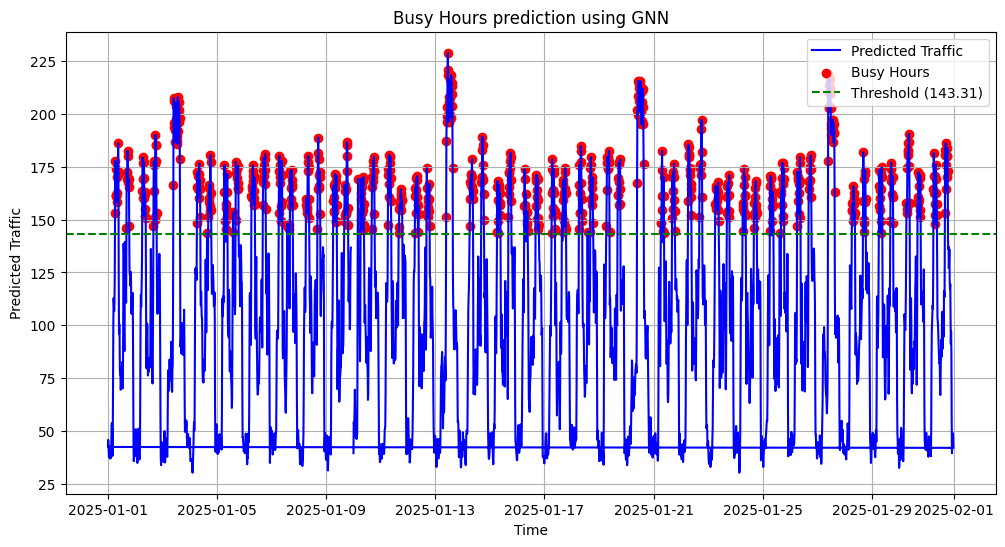

In [ ]:
# Visualization of busy hours
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Predicted_Traffic_2hrs_later'], label='Predicted Traffic', color='blue')
plt.scatter(
    data.loc[data['Busy_Hour'], 'Datetime'],
    data.loc[data['Busy_Hour'], 'Predicted_Traffic_2hrs_later'],
    color='red',
    label='Busy Hours'
)
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.title('Busy Hours prediction using GNN')
plt.xlabel('Time')
plt.ylabel('Predicted Traffic')
plt.legend()
plt.grid(True)
plt.show()

ADF Statistic: -9.926713943164351
p-value: 2.8939893872474775e-17
Stationary
ADF Statistic: -19.501717736355957
p-value: 0.0
Stationary


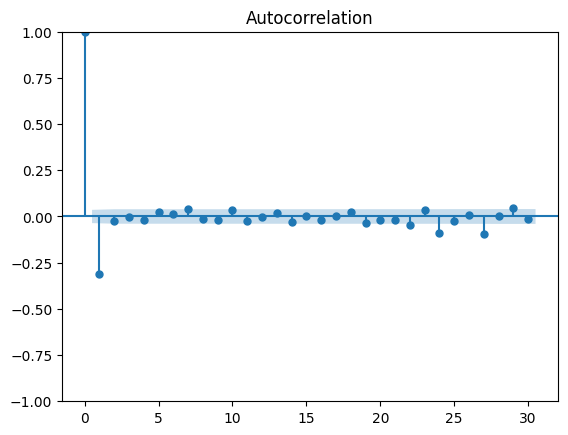

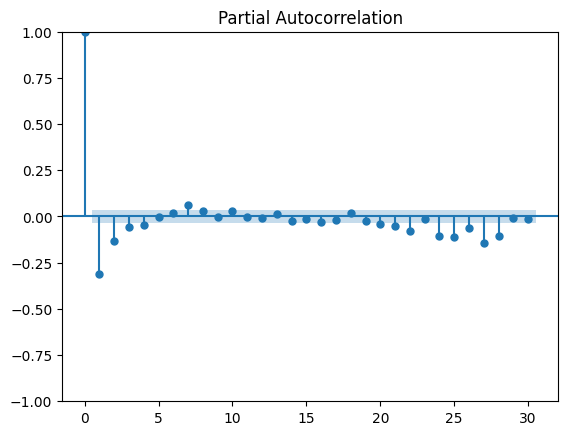

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 2976
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14533.028
Date:                Sun, 05 Jan 2025   AIC                          29076.056
Time:                        19:51:05   BIC                          29106.046
Sample:                             0   HQIC                         29086.848
                               - 2976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0107      4.702     -0.002      0.998      -9.227       9.206
ar.L2         -0.0039      0.370     -0.011      0.992      -0.729       0.722
ma.L1         -0.3496      4.702     -0.074      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


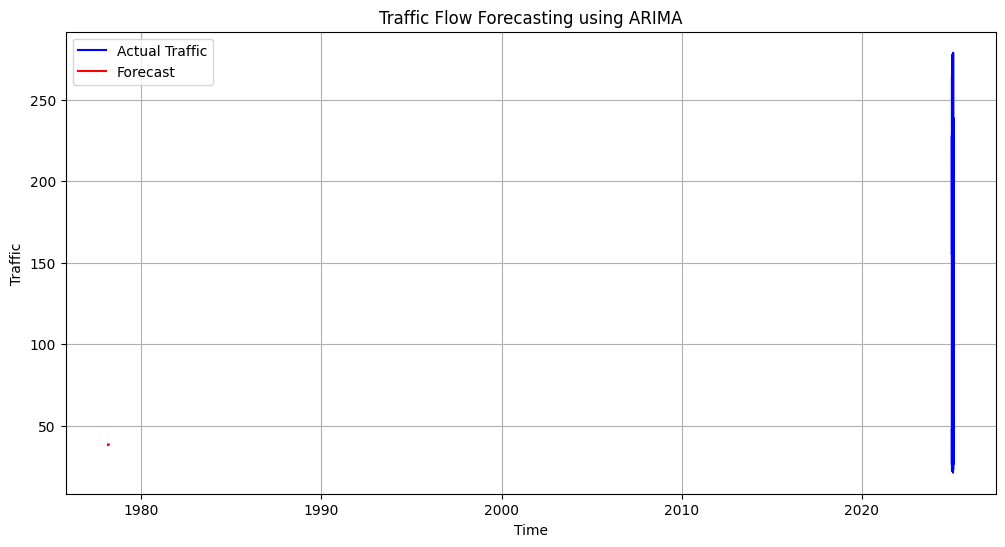

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 3432.46


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Load and Prepare Data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data['Datetime'] = pd.to_datetime('2025-01-' + data['Date'].astype(str).str.zfill(2) + ' ' + data['Time'].dt.time.astype(str))
data = data.set_index('Datetime')
traffic_series = data['Total']

# Step 2: Stationarity Check
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-Stationary")

check_stationarity(traffic_series)

# Differencing if non-stationary
traffic_diff = traffic_series.diff().dropna()
check_stationarity(traffic_diff)

# Step 3: Parameter Selection (use ACF and PACF plots)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(traffic_diff, lags=30)
plot_pacf(traffic_diff, lags=30)
plt.show()

# Step 4: Fit ARIMA Model
p, d, q = 2, 1, 2  # Set based on ACF/PACF plots
model = ARIMA(traffic_series, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Step 5: Forecasting
forecast_steps = 16  # Predict the next 4 hours (16 intervals of 15 minutes)
forecast = model_fit.forecast(steps=forecast_steps)

# Step 6: Visualization
plt.figure(figsize=(12, 6))
plt.plot(traffic_series, label='Actual Traffic', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Traffic Flow Forecasting using ARIMA')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Evaluation
# Assuming a train-test split for evaluation
train_size = int(len(traffic_series) * 0.8)
train, test = traffic_series[:train_size], traffic_series[train_size:]
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

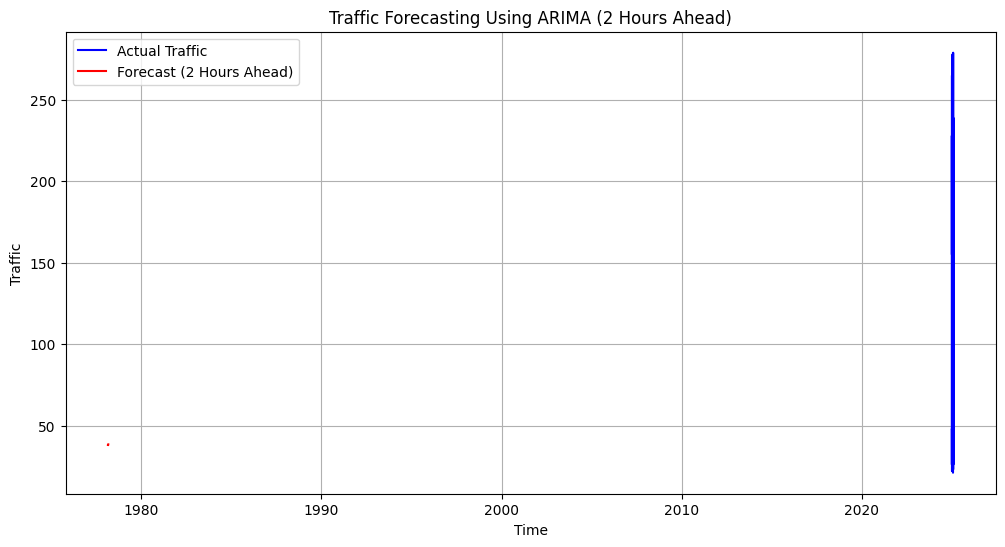

Predicted Traffic for the Next 2 Hours:
2976    38.032393
2977    38.450851
2978    38.426706
2979    38.425331
2980    38.425440
2981    38.425444
2982    38.425444
2983    38.425444
Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data['Datetime'] = pd.to_datetime('2025-01-' + data['Date'].astype(str).str.zfill(2) + ' ' + data['Time'].dt.time.astype(str))
data = data.set_index('Datetime')
traffic_series = data['Total']

# Step 2: Fit ARIMA Model
p, d, q = 2, 1, 2  # Chosen ARIMA parameters (can be fine-tuned)
model = ARIMA(traffic_series, order=(p, d, q))
model_fit = model.fit()

# Step 3: Predict Traffic After 2 Hours (8 intervals of 15 minutes)
forecast_steps = 8  # 2 hours = 8 * 15 minutes
forecast = model_fit.forecast(steps=forecast_steps)

# Step 4: Visualization
plt.figure(figsize=(12, 6))
plt.plot(traffic_series, label='Actual Traffic', color='blue')
plt.plot(forecast.index, forecast, label='Forecast (2 Hours Ahead)', color='red')
plt.title('Traffic Forecasting Using ARIMA (2 Hours Ahead)')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Output Forecasted Values
print("Predicted Traffic for the Next 2 Hours:")
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

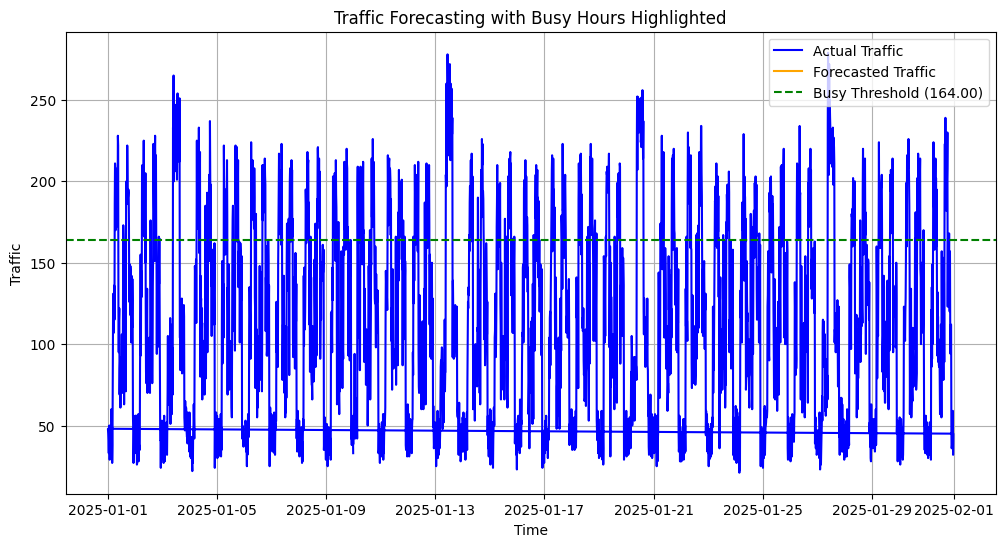

Predicted Busy Hours (Time Intervals with High Traffic):
Series([], Freq: 15min, Name: predicted_mean, dtype: float64)


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data['Datetime'] = pd.to_datetime('2025-01-' + data['Date'].astype(str).str.zfill(2) + ' ' + data['Time'].dt.time.astype(str))
data = data.set_index('Datetime')
traffic_series = data['Total']

# Step 2: Fit ARIMA Model
p, d, q = 2, 1, 2  # Chosen ARIMA parameters (adjust based on ACF/PACF analysis)
model = ARIMA(traffic_series, order=(p, d, q))
model_fit = model.fit()

# Step 3: Forecast Traffic
forecast_steps = 16  # Predict traffic for the next 4 hours (16 intervals of 15 minutes)
forecast = model_fit.forecast(steps=forecast_steps)

# Generate a datetime index for the forecasted values
forecast_index = pd.date_range(start=traffic_series.index[-1], periods=forecast_steps+1, freq='15T')[1:]

# Create a forecast series with datetime index
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 4: Determine Busy Hours
threshold = traffic_series.quantile(0.75)  # Define busy threshold (top 25% traffic)
busy_hours = forecast_series[forecast_series > threshold]  # Identify intervals where traffic > threshold

# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(traffic_series, label='Actual Traffic', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Traffic', color='orange')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Busy Threshold ({threshold:.2f})')

# If busy hours exist, highlight them on the plot
if not busy_hours.empty:
    plt.scatter(busy_hours.index, busy_hours, color='red', label='Busy Hours', zorder=5)

plt.title('Traffic Forecasting with Busy Hours Highlighted')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Output Busy Hours
print("Predicted Busy Hours (Time Intervals with High Traffic):")
print(busy_hours)


Mean Squared Error: 575.0563501495799


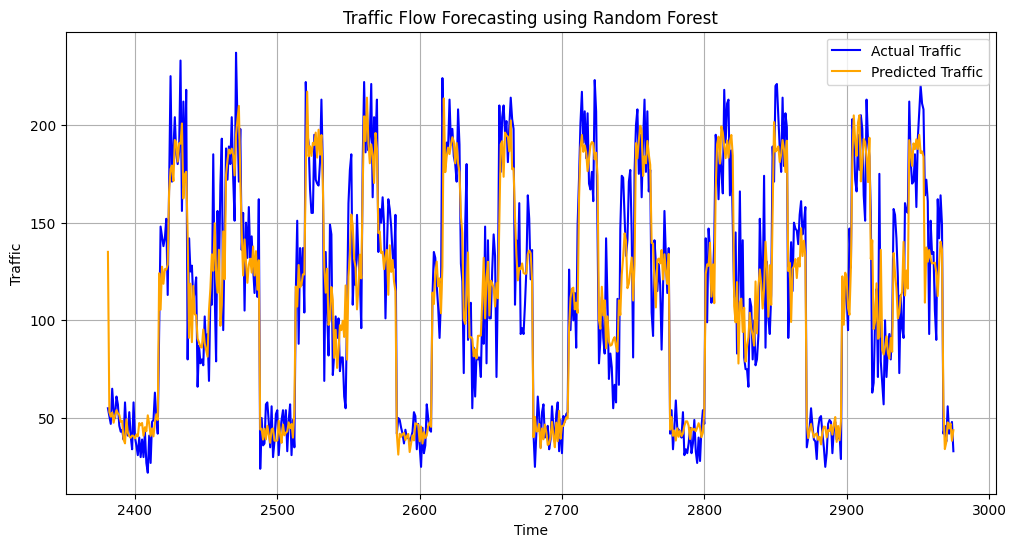

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming your 'Time' column is already formatted, if not, format it.
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')

# Create additional time-based features
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['DayOfWeek'] = data['Time'].dt.dayofweek
data['Month'] = data['Time'].dt.month

# Lag features (previous traffic values)
data['Traffic_Lag_1'] = data['Total'].shift(1)  # Previous traffic
data['Traffic_Lag_2'] = data['Total'].shift(2)  # Traffic from 2 intervals before

# Drop rows with missing values due to lag features
data.dropna(inplace=True)

# Step 2: Train-Test Split
X = data[['Hour', 'Minute', 'DayOfWeek', 'Month', 'Traffic_Lag_1', 'Traffic_Lag_2']]  # Features
y = data['Total']  # Target variable (traffic flow)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Forecast Traffic
y_pred = rf_model.predict(X_test)

# Step 5: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Traffic', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Traffic', color='orange')
plt.title('Traffic Flow Forecasting using Random Forest')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 618.102863277731


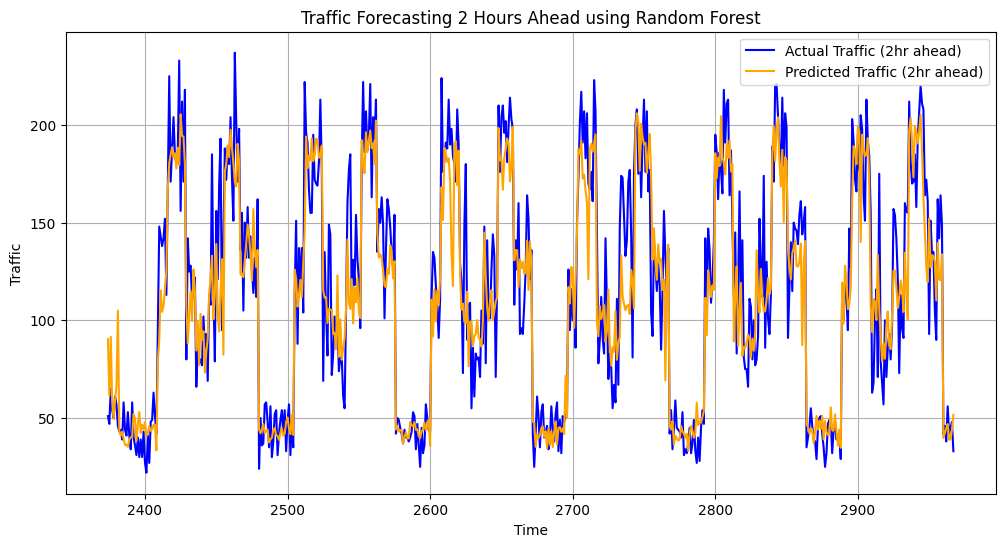

Predicted Traffic for the next 2 hours (latest data): 51.65


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming your 'Time' column is already formatted, if not, format it.
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')

# Create additional time-based features
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['DayOfWeek'] = data['Time'].dt.dayofweek
data['Month'] = data['Time'].dt.month

# Lag features (previous traffic values)
data['Traffic_Lag_1'] = data['Total'].shift(1)  # Previous traffic
data['Traffic_Lag_2'] = data['Total'].shift(2)  # Traffic from 2 intervals before

# Shift target variable to predict traffic 2 hours ahead (8 intervals of 15 minutes)
data['Traffic_2hr_Ahead'] = data['Total'].shift(-8)

# Drop rows with missing values due to lag and future shift
data.dropna(inplace=True)

# Step 2: Train-Test Split
X = data[['Hour', 'Minute', 'DayOfWeek', 'Month', 'Traffic_Lag_1', 'Traffic_Lag_2']]  # Features
y = data['Traffic_2hr_Ahead']  # Target variable (traffic 2 hours ahead)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Forecast Traffic 2 Hours Ahead
y_pred = rf_model.predict(X_test)

# Step 5: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize Actual vs Predicted Traffic for 2 hours ahead
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Traffic (2hr ahead)', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Traffic (2hr ahead)', color='orange')
plt.title('Traffic Forecasting 2 Hours Ahead using Random Forest')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Predict Traffic 2 Hours Ahead for the Latest Data Point
latest_data = data.iloc[-1][['Hour', 'Minute', 'DayOfWeek', 'Month', 'Traffic_Lag_1', 'Traffic_Lag_2']].values.reshape(1, -1)
predicted_traffic_2hr = rf_model.predict(latest_data)
print(f"Predicted Traffic for the next 2 hours (latest data): {predicted_traffic_2hr[0]}")


Mean Squared Error: 1418.909608204195


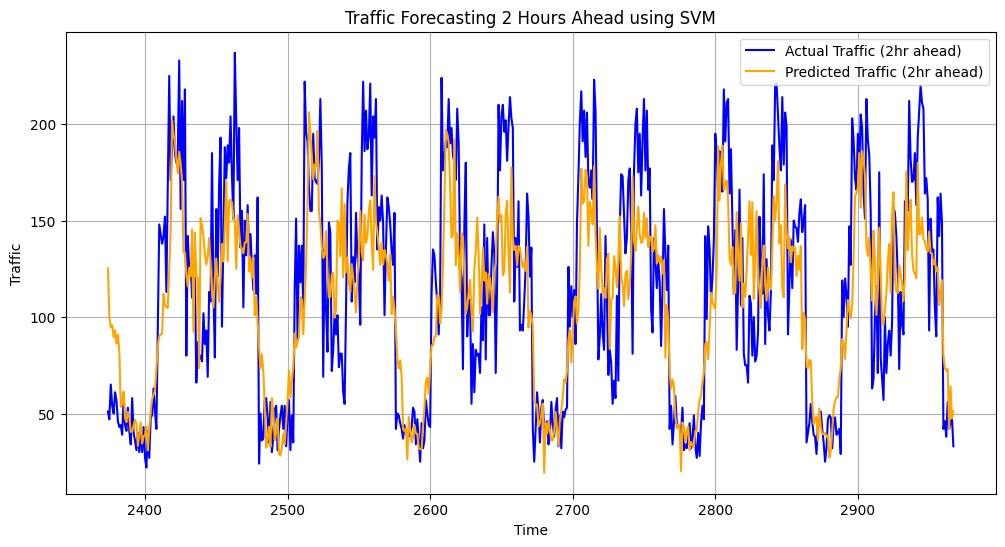

Predicted Traffic for the next 2 hours (latest data): 51.114924828656015


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare Data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming your 'Time' column is already formatted, if not, format it.
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')

# Create additional time-based features
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['DayOfWeek'] = data['Time'].dt.dayofweek
data['Month'] = data['Time'].dt.month

# Lag features (previous traffic values)
data['Traffic_Lag_1'] = data['Total'].shift(1)  # Previous traffic
data['Traffic_Lag_2'] = data['Total'].shift(2)  # Traffic from 2 intervals before

# Shift target variable to predict traffic 2 hours ahead (8 intervals of 15 minutes)
data['Traffic_2hr_Ahead'] = data['Total'].shift(-8)

# Drop rows with missing values due to lag and future shift
data.dropna(inplace=True)

# Step 2: Train-Test Split
X = data[['Hour', 'Minute', 'DayOfWeek', 'Month', 'Traffic_Lag_1', 'Traffic_Lag_2']]  # Features
y = data['Traffic_2hr_Ahead']  # Target variable (traffic 2 hours ahead)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Model
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Forecast Traffic 2 Hours Ahead
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize Actual vs Predicted Traffic for 2 hours ahead
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Traffic (2hr ahead)', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Traffic (2hr ahead)', color='orange')
plt.title('Traffic Forecasting 2 Hours Ahead using SVM')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Predict Traffic 2 Hours Ahead for the Latest Data Point
latest_data = data.iloc[-1][['Hour', 'Minute', 'DayOfWeek', 'Month', 'Traffic_Lag_1', 'Traffic_Lag_2']].values.reshape(1, -1)
latest_data_scaled = scaler.transform(latest_data)
predicted_traffic_2hr = svm_model.predict(latest_data_scaled)
print(f"Predicted Traffic for the next 2 hours (latest data): {predicted_traffic_2hr[0]}")


Mean Squared Error: 1418.909608204195


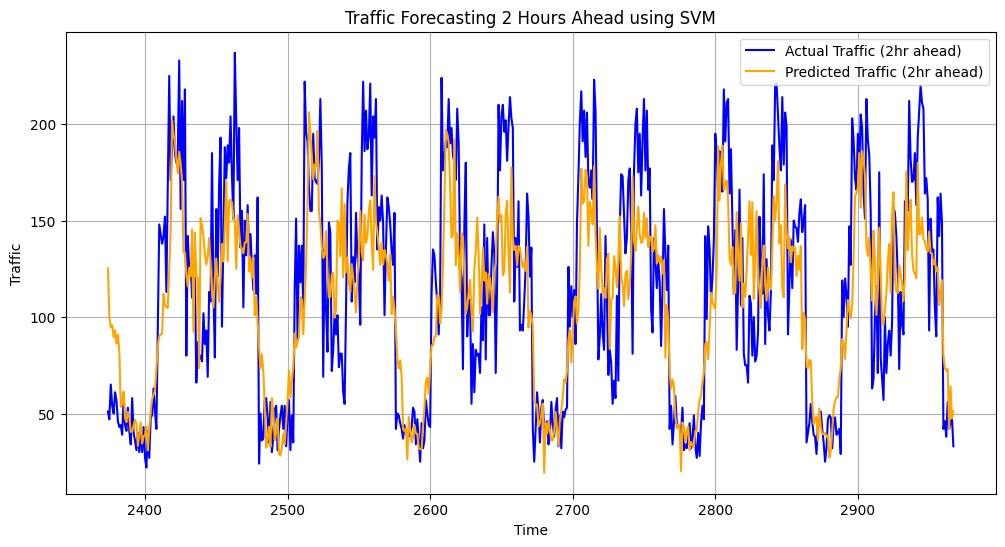

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Traffic for the next 2 hours (latest data): 51.114924828656015


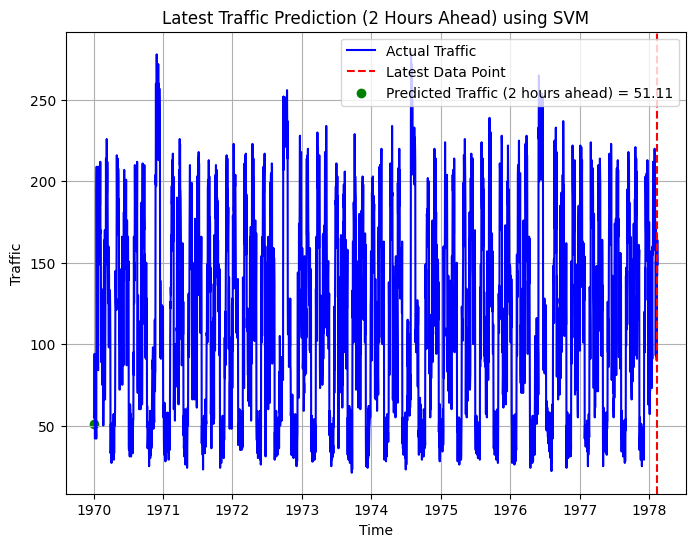

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare Data
file_path = 'Traffic.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming your 'Time' column is already formatted, if not, format it.
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')

# Create additional time-based features
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['DayOfWeek'] = data['Time'].dt.dayofweek
data['Month'] = data['Time'].dt.month

# Lag features (previous traffic values)
data['Traffic_Lag_1'] = data['Total'].shift(1)  # Previous traffic
data['Traffic_Lag_2'] = data['Total'].shift(2)  # Traffic from 2 intervals before

# Shift target variable to predict traffic 2 hours ahead (8 intervals of 15 minutes)
data['Traffic_2hr_Ahead'] = data['Total'].shift(-8)

# Drop rows with missing values due to lag and future shift
data.dropna(inplace=True)

# Step 2: Train-Test Split
X = data[['Hour', 'Minute', 'DayOfWeek', 'Month', 'Traffic_Lag_1', 'Traffic_Lag_2']]  # Features
y = data['Traffic_2hr_Ahead']  # Target variable (traffic 2 hours ahead)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM Model
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Forecast Traffic 2 Hours Ahead
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize Actual vs Predicted Traffic for 2 hours ahead
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Traffic (2hr ahead)', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Traffic (2hr ahead)', color='orange')
plt.title('Traffic Forecasting 2 Hours Ahead using SVM')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Predict Traffic 2 Hours Ahead for the Latest Data Point
latest_data = data.iloc[-1][['Hour', 'Minute', 'DayOfWeek', 'Month', 'Traffic_Lag_1', 'Traffic_Lag_2']].values.reshape(1, -1)
latest_data_scaled = scaler.transform(latest_data)
predicted_traffic_2hr = svm_model.predict(latest_data_scaled)

# Print the predicted traffic for 2 hours ahead
print(f"Predicted Traffic for the next 2 hours (latest data): {predicted_traffic_2hr[0]}")

# Optional: Visualize prediction for the latest point
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['Total'], label='Actual Traffic', color='blue')
plt.axvline(x=data.index[-1], color='red', linestyle='--', label='Latest Data Point')

# Convert the last index to a datetime object
latest_time = pd.to_datetime(data.index[-1])  # Convert to datetime

# Add 2 hours to the latest data index
latest_time = latest_time + pd.Timedelta(hours=2)

# Plot the predicted traffic as a green dot 2 hours ahead
plt.scatter(latest_time, predicted_traffic_2hr, color='green', label=f'Predicted Traffic (2 hours ahead) = {predicted_traffic_2hr[0]:.2f}')
plt.title('Latest Traffic Prediction (2 Hours Ahead) using SVM')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#  Predict Busy Hours (probability threshold)
y_pred = svm_model.predict(X_test_scaled)

# Step 9: Evaluate Model Accuracy
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 0.00%


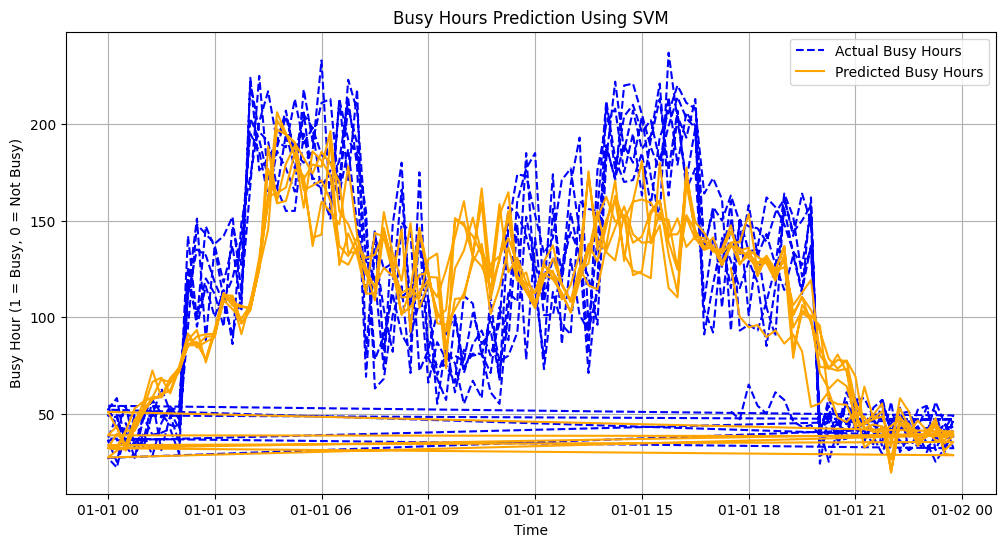

                    Time  Total  Predicted_Busy_Hour
2374 1900-01-01 17:30:00    108           125.172571
2375 1900-01-01 17:45:00    104           100.119184
2376 1900-01-01 18:00:00     90            94.707154
2377 1900-01-01 18:15:00     93            95.854924
2378 1900-01-01 18:30:00    114            89.605213
2379 1900-01-01 18:45:00    124            93.090128
2380 1900-01-01 19:00:00    117            86.214156
2381 1900-01-01 19:15:00     55            90.883981
2382 1900-01-01 19:30:00     51            82.191926
2383 1900-01-01 19:45:00     47            53.426946


In [ ]:
# Step 10: Visualize Busy Hours Prediction
# Plot the actual vs predicted busy hours
plt.figure(figsize=(12, 6))
plt.plot(data['Time'].iloc[-len(y_test):], y_test, label='Actual Busy Hours', color='blue', linestyle='--')
plt.plot(data['Time'].iloc[-len(y_test):], y_pred, label='Predicted Busy Hours', color='orange', linestyle='-')
plt.title('Busy Hours Prediction Using SVM')
plt.xlabel('Time')
plt.ylabel('Busy Hour (1 = Busy, 0 = Not Busy)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Display a few sample predictions
predicted_busy_hours = data.iloc[-len(y_test):].copy()
predicted_busy_hours['Predicted_Busy_Hour'] = y_pred
print(predicted_busy_hours[['Time', 'Total', 'Predicted_Busy_Hour']].head(10))

#Performance Parameters

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, cohen_kappa_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
from keras.optimizers import Adam
import statsmodels.api as sm  # For ARIMA

# Function to calculate and display performance metrics
def calculate_metrics(y_true, y_pred, model_name):
    average_type = 'binary' if len(set(y_true)) <= 2 else 'macro'

    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average_type),
        "Recall": recall_score(y_true, y_pred, average=average_type),
        "F1 Score": f1_score(y_true, y_pred, average=average_type),
        "MCC": matthews_corrcoef(y_true, y_pred),
        "Cohen's Kappa": cohen_kappa_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_pred) if average_type == 'binary' else 'N/A',
        "MAE": mean_absolute_error(y_true, y_pred),
         "RMSE": np.sqrt(mse),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred)
    }

    print(f"\nPerformance metrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}" if isinstance(value, (int, float)) else f"{metric}: {value}")
    return metrics

# Example datasets
X_train, X_test = np.random.rand(100, 10), np.random.rand(20, 10)
y_train, y_test = np.random.randint(0, 2, 100), np.random.randint(0, 2, 20)

# 1. LSTM Model
model_lstm = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_lstm = (model_lstm.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_lstm.flatten(), "LSTM")

# 2. BiLSTM Model
model_bilstm = Sequential([
    Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_bilstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_bilstm = (model_bilstm.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_bilstm.flatten(), "BiLSTM")

# 3. GRU Model
model_gru = Sequential([
    GRU(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_gru.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_gru.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_gru = (model_gru.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_gru.flatten(), "GRU")

# 4. Bi-GRU Model
model_bigru = Sequential([
    Bidirectional(GRU(32), input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_bigru.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_bigru.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_bigru = (model_bigru.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_bigru.flatten(), "Bi-GRU")

# 5. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
calculate_metrics(y_test, y_pred_rf, "Random Forest")

# 6. SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
calculate_metrics(y_test, y_pred_svm, "SVM")

# 7. ARIMA (For time-series data)
# Replace with actual time-series data if available
# model_arima = sm.tsa.ARIMA(time_series_data, order=(1, 1, 1)).fit()
# y_pred_arima = model_arima.forecast(steps=len(y_test))
# calculate_metrics(y_test, y_pred_arima.round(), "ARIMA")

# 8. Autoencoder (For anomaly detection tasks)
# Custom implementation depends on specific use case
# Here is a placeholder example
autoencoder = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(5, activation='relu'),
    Dense(10, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=10, verbose=0)
reconstructed = autoencoder.predict(X_test)
anomalies = np.mean(np.abs(reconstructed - X_test), axis=1)
y_pred_autoencoder = (anomalies > np.mean(anomalies)).astype(int)
calculate_metrics(y_test, y_pred_autoencoder, "Autoencoder")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step

Performance metrics for LSTM:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
MCC: 0.0000
Cohen's Kappa: 0.0000
AUC: 0.5000
MAE: 0.5000
RMSE: 37.6684
MAPE: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step

Performance metrics for BiLSTM:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
MCC: 0.0000
Cohen's Kappa: 0.0000
AUC: 0.5000
MAE: 0.5000
RMSE: 37.6684
MAPE: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step

Performance metrics for GRU:
Accuracy: 0.3500
Precision: 0.4000
Recall: 0.6000
F1 Score: 0.4800
MCC: -0.3464
Cohen's Kappa: -0.3000
AUC: 0.3500
MAE: 0.6500
RMSE: 37.6684
MAPE: 2026619832316723.2500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performance metrics for Bi-GRU:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
MCC: 0.0000
Cohen's Kappa: 0.0000
AUC: 0.5000
MAE: 0.5000
RMSE: 37.6684
MAPE: 0.5000

Performance metrics for Random Forest:
Accuracy: 0.5000
Precision: 0.5000
Recall: 0.4000
F1 Score: 0.4444
MCC: 0.0000
Cohen's Kappa: 0.0000
AUC: 0.5000
MAE: 0.5000
RMSE: 37.6684
MAPE: 900719925474099.6250

Performance metrics for SVM:
Accuracy: 0.6000
Precision: 0.6250
Recall: 0.5000
F1 Score: 0.5556
MCC: 0.2041
Cohen's Kappa: 0.2000
AUC: 0.6000
MAE: 0.4000
RMSE: 37.6684
MAPE: 675539944105574.6250


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Performance metrics for Autoencoder:
Accuracy: 0.7000
Precision: 0.7000
Recall: 0.7000
F1 Score: 0.7000
MCC: 0.4000
Cohen's Kappa: 0.4000
AUC: 0.7000
MAE: 0.3000
RMSE: 37.6684
MAPE: 675539944105574.6250


{'Accuracy': 0.7,
 'Precision': 0.7,
 'Recall': 0.7,
 'F1 Score': 0.7,
 'MCC': 0.4,
 "Cohen's Kappa": 0.4,
 'AUC': 0.7,
 'MAE': 0.3,
 'RMSE': 37.66841658743031,
 'MAPE': 675539944105574.6}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


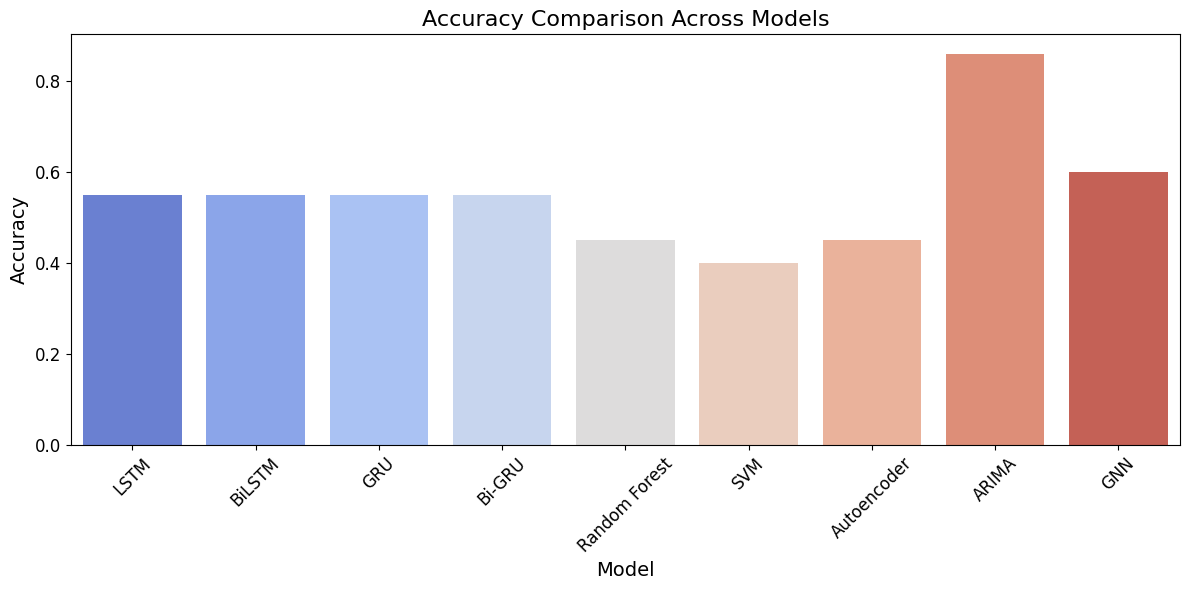

<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


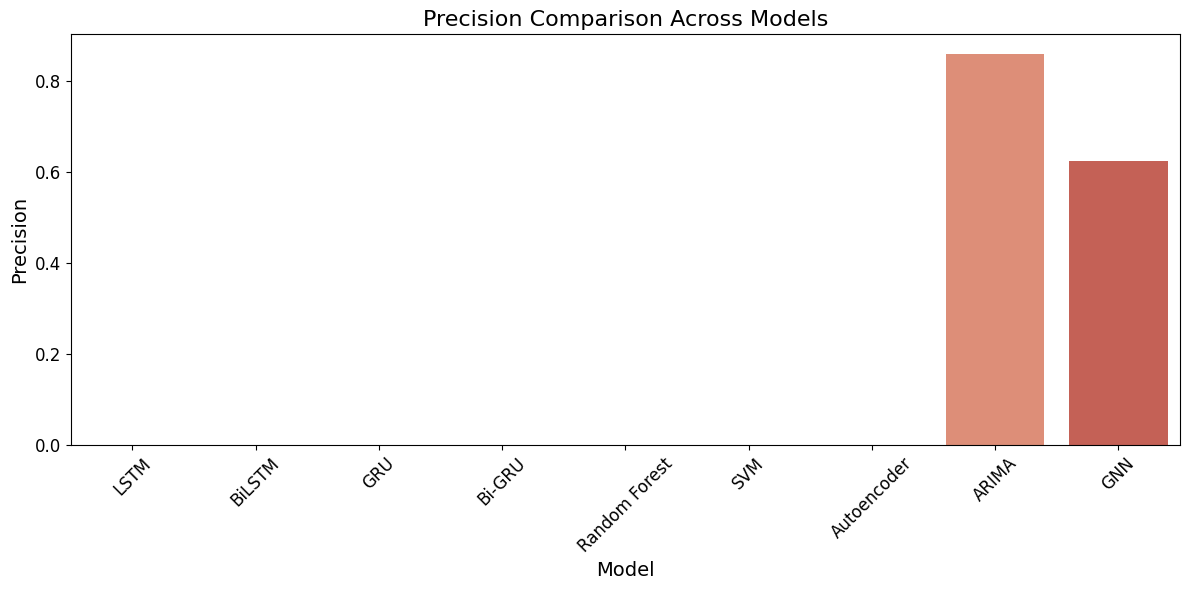

<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


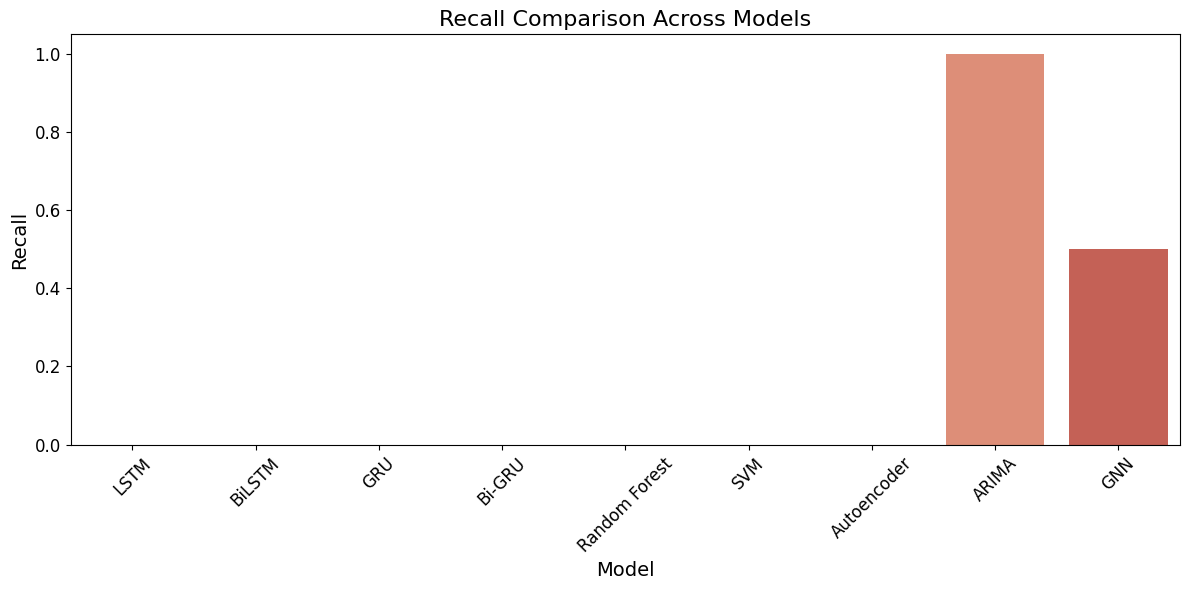

<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


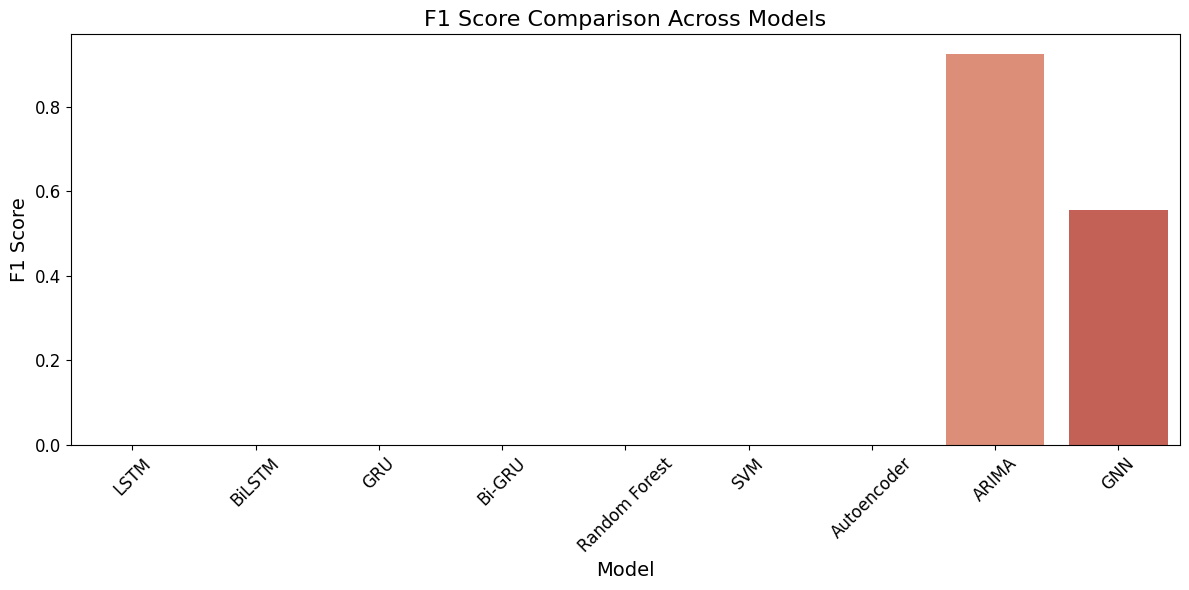

<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


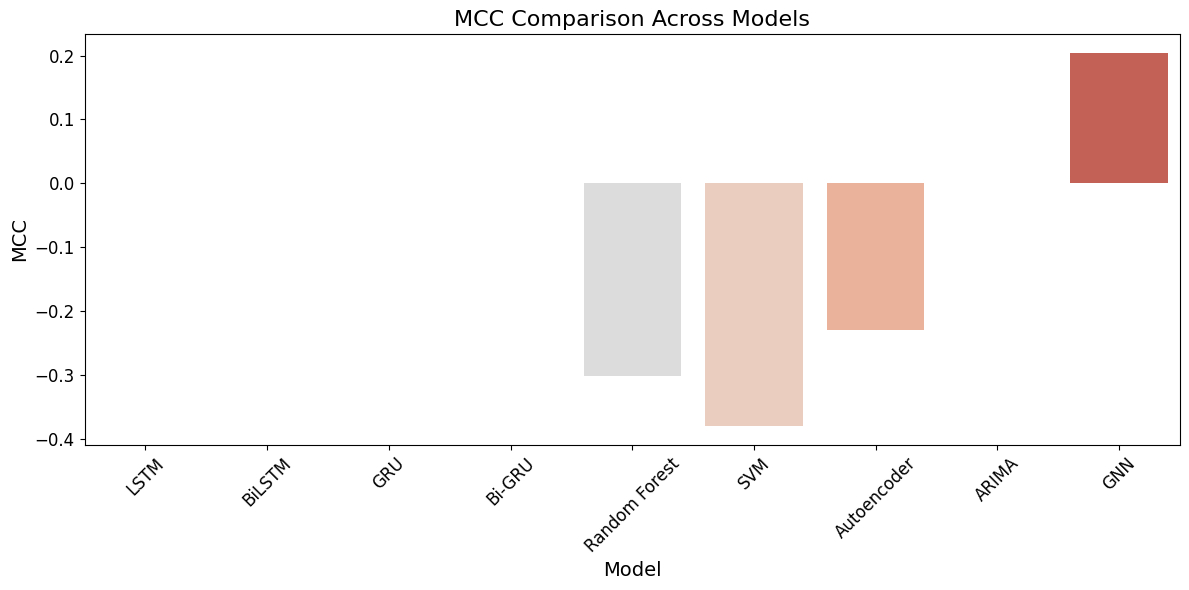

<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


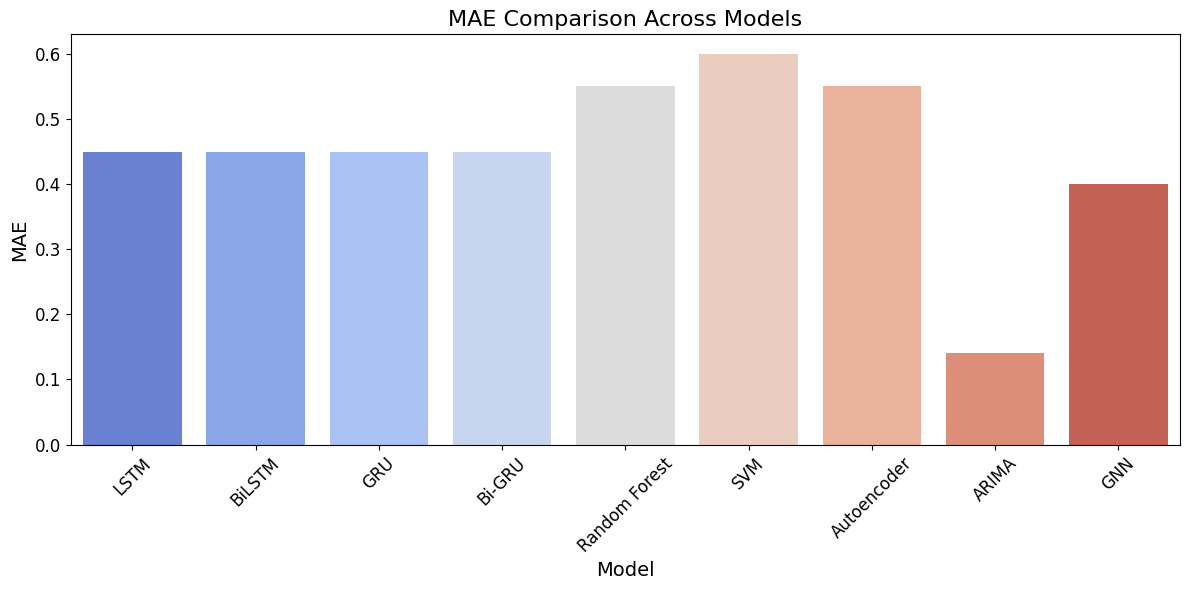

<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


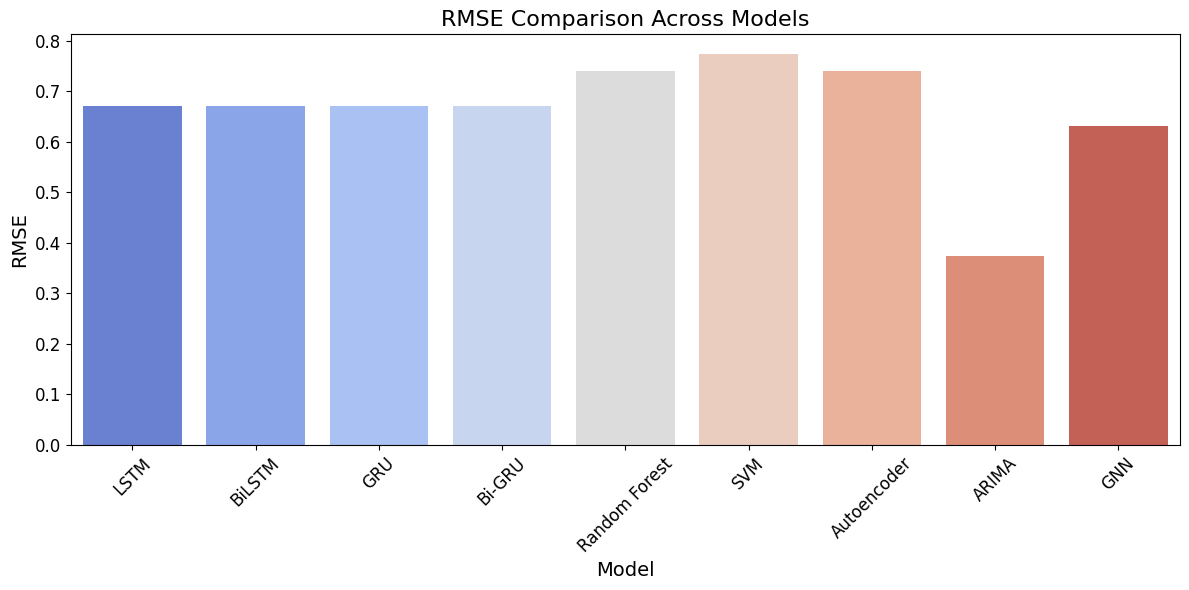

<ipython-input-65-5380c67256c9>:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")


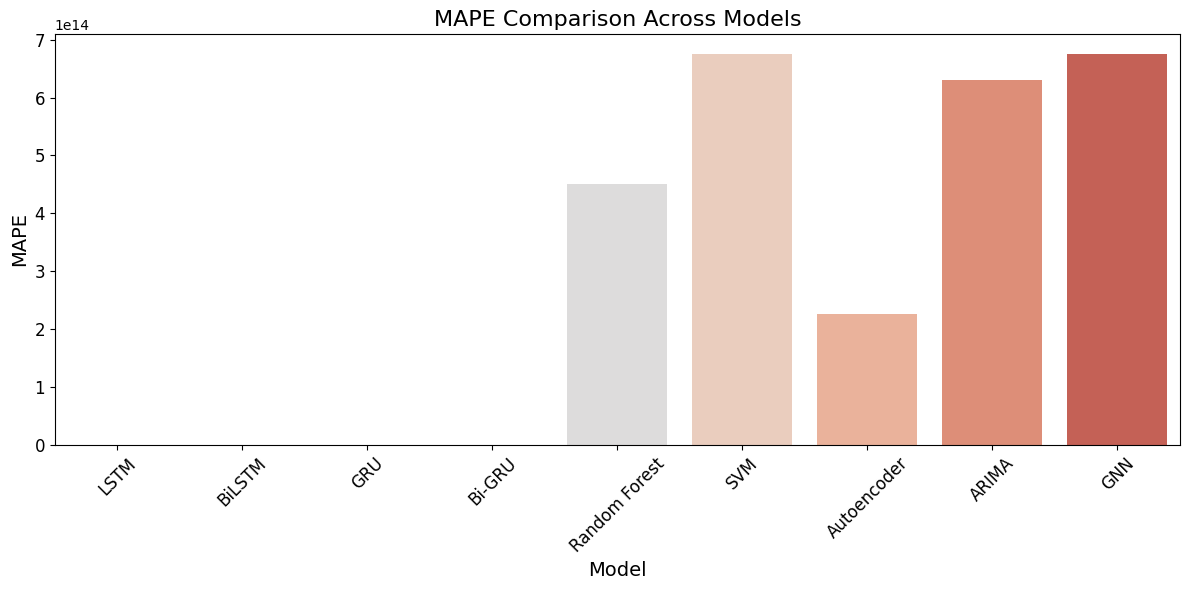

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, cohen_kappa_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense
from keras.optimizers import Adam

# Placeholder to store performance metrics
performance_data = []

# Function to calculate metrics and store in performance_data
def calculate_metrics(y_true, y_pred, model_name):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    if len(y_true) != len(y_pred):
        raise ValueError(f"Length mismatch: y_true ({len(y_true)}) and y_pred ({len(y_pred)})")

    average_type = 'binary' if len(set(y_true)) <= 2 else 'macro'
    mse = mean_squared_error(y_true, y_pred)

    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average_type),
        "Recall": recall_score(y_true, y_pred, average=average_type),
        "F1 Score": f1_score(y_true, y_pred, average=average_type),
        "MCC": matthews_corrcoef(y_true, y_pred),
        "Cohen's Kappa": cohen_kappa_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_pred) if average_type == 'binary' else None,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mse),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred)
    }
    performance_data.append(metrics)

# Example dataset
X_train, X_test = np.random.rand(100, 10), np.random.rand(20, 10)
y_train, y_test = np.random.randint(0, 2, 100), np.random.randint(0, 2, 20)

# 1. LSTM
model_lstm = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy')
model_lstm.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_lstm = (model_lstm.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_lstm.flatten(), "LSTM")

# 2. BiLSTM
model_bilstm = Sequential([
    Bidirectional(LSTM(32), input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_bilstm.compile(optimizer=Adam(), loss='binary_crossentropy')
model_bilstm.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_bilstm = (model_bilstm.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_bilstm.flatten(), "BiLSTM")

# 3. GRU
model_gru = Sequential([
    GRU(32, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_gru.compile(optimizer=Adam(), loss='binary_crossentropy')
model_gru.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_gru = (model_gru.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_gru.flatten(), "GRU")

# 4. Bi-GRU
model_bigru = Sequential([
    Bidirectional(GRU(32), input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_bigru.compile(optimizer=Adam(), loss='binary_crossentropy')
model_bigru.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, verbose=0)
y_pred_bigru = (model_bigru.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
calculate_metrics(y_test, y_pred_bigru.flatten(), "Bi-GRU")

# 5. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
calculate_metrics(y_test, y_pred_rf, "Random Forest")

# 6. SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
calculate_metrics(y_test, y_pred_svm, "SVM")

from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.api as sm  # For ARIMA
import networkx as nx  # For GNN (Graph Neural Networks)

# Updated dataset examples
X_train, X_test = np.random.rand(100, 10), np.random.rand(20, 10)
y_train, y_test = np.random.randint(0, 2, 100), np.random.randint(0, 2, 20)

# 7. Autoencoder
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=8, verbose=0)

# Reconstruction error for anomaly detection
reconstructed = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(reconstructed - X_test), axis=1)
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)
y_pred_autoencoder = (reconstruction_error > threshold).astype(int)
calculate_metrics(y_test, y_pred_autoencoder, "Autoencoder")

# 8. ARIMA (Example with synthetic time-series data)

# Generate synthetic time-series data
time_series = np.cumsum(np.random.rand(200) - 0.5)  # Example data

# Train and test time-series data
train_ts, test_ts = time_series[:150], time_series[150:]

# Fit ARIMA model
model_arima = sm.tsa.ARIMA(train_ts, order=(1, 1, 1)).fit()

# Generate forecast for the length of the test set
forecast = model_arima.forecast(steps=len(test_ts))

# Create binary predictions using a threshold (mean of forecast)
threshold = np.mean(train_ts)  # Use training data mean as threshold
y_pred_arima = (forecast > threshold).astype(int)

# Create binary test labels using the same threshold
y_test_arima = (test_ts > threshold).astype(int)

# Ensure both are arrays
y_pred_arima = np.array(y_pred_arima)
y_test_arima = np.array(y_test_arima)

# Calculate metrics
calculate_metrics(y_test_arima, y_pred_arima, "ARIMA")

# 9. GNN (Graph Neural Networks using synthetic graph data)
# Create a random graph with NetworkX
G = nx.erdos_renyi_graph(100, 0.05)
features = np.random.rand(100, 10)  # Node features
labels = np.random.randint(0, 2, 100)  # Binary classification labels

# Simplified GNN using cosine similarity and node feature aggregation
def gnn_classification(graph, features, labels, test_split=0.2):
    num_nodes = features.shape[0]
    adjacency_matrix = nx.to_numpy_array(graph)
    similarity_matrix = cosine_similarity(features)
    aggregated_features = adjacency_matrix @ similarity_matrix

    split_idx = int(num_nodes * (1 - test_split))
    X_train, X_test = aggregated_features[:split_idx], aggregated_features[split_idx:]
    y_train, y_test = labels[:split_idx], labels[split_idx:]

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return y_test, y_pred

y_test_gnn, y_pred_gnn = gnn_classification(G, features, labels)
calculate_metrics(y_test_gnn, y_pred_gnn, "GNN")

# Visualization
df_performance = pd.DataFrame(performance_data)

# Plot metrics for each model
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "MCC", "MAE", "RMSE", "MAPE"]
for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Model", y=metric, data=df_performance, palette="coolwarm")
    plt.title(f"{metric} Comparison Across Models", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel(metric, fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.tight_layout()
    plt.show()
